In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from latex import latexify, format_axes
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from MakeDataset import *
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

### Template for PCA Plotting

In [211]:
def PCA_Plot(dataFrame):
    latexify(fig_width = 6, columns = 2)
    for label, color in zip((classes), ("b", "g", "r", "cyan", "magenta", "yellow")):
        plt.scatter(dataFrame[dataFrame["Labels"] == classes[label]].iloc[:, 0], dataFrame[dataFrame["Labels"] == classes[label]].iloc[:, 1], c = color, s = 10, label = label)
    plt.title("108 Subject Samples in 2D for 6 activity classes")
    plt.grid()
    plt.legend(fontsize = 7)
    format_axes(plt.gca())
    plt.show()

### $(a_x, a_y, a_z)$

In [212]:
aXYZ_Xtrain = X_train[:, :, 0], X_train[:, :, 1], X_train[:, :, 2]

### $(a_x^2 + a_y^2 + a_z^2)$

In [213]:
X_train_TS = np.sum(np.square(X_train), axis = -1)
X_test_TS = np.sum(np.square(X_test), axis = -1)
X_val_TS = np.sum(np.square(X_val), axis = -1)
print(X_train_TS.shape, X_test_TS.shape, X_val_TS.shape)

(108, 500) (36, 500) (36, 500)


### DataFrame for $(a_x^2 + a_y^2 + a_z^2)$ $108$ timeseries

In [229]:
df = pd.DataFrame(X_train_TS)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.056837,1.055002,1.055806,1.056825,1.056743,1.058030,1.059746,1.056402,1.051561,1.051040,...,1.059888,1.052544,1.056687,1.060374,1.060270,1.057576,1.050376,1.052854,1.056003,1.050580
1,1.083240,1.076504,1.071849,1.070542,1.073735,1.069331,1.065576,1.070615,1.073486,1.074425,...,1.076160,1.072783,1.070026,1.066329,1.064303,1.069655,1.073976,1.075890,1.078382,1.072455
2,1.138189,1.118926,1.010193,0.908460,0.877500,0.799665,0.755336,0.604213,0.398809,0.387867,...,1.131734,1.211883,1.395558,1.574451,1.786266,2.000218,2.163595,2.539505,2.744447,2.195609
3,1.181108,1.152283,1.143152,1.270364,1.238777,1.149924,1.015107,0.984543,1.273980,1.684522,...,0.621903,1.029622,1.784374,2.366215,2.621218,2.250886,1.741832,1.685947,1.807674,1.804153
4,1.011227,1.017584,1.013233,1.011926,1.009752,1.005219,1.001461,1.005883,1.007562,1.007073,...,1.009191,1.006528,1.004264,1.003962,1.007311,1.005560,0.999966,0.998143,1.002371,1.010588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.865182,4.214804,3.753230,3.061401,2.623248,2.179369,1.739349,1.163332,0.690809,0.565457,...,0.356185,0.427389,0.798711,1.197703,1.243965,0.946267,0.564336,0.293897,0.148865,0.159150
104,1.481487,1.741766,1.863997,2.701391,3.711884,2.941636,1.958033,1.226824,0.424725,0.531432,...,0.933847,1.111377,1.231115,0.981100,0.879569,0.951810,1.042146,1.437269,1.472829,1.380977
105,1.059227,1.066083,1.065851,1.062518,1.058762,1.059328,1.061447,1.058565,1.055911,1.054685,...,1.059269,1.056765,1.065482,1.075214,1.068180,1.058619,1.062407,1.066245,1.065190,1.068413
106,0.822379,0.796867,0.860853,0.768546,0.678476,0.590875,0.531713,0.612083,0.699120,0.818263,...,0.773623,0.715825,0.680630,0.717506,0.754631,0.822995,0.853608,0.882437,0.884731,0.870595


### Defining Named CLasses

In [230]:
classesN = {1 : 'WALKING', 2 : 'WALKING_UPSTAIRS', 3 : 'WALKING_DOWNSTAIRS', 4 : 'SITTING', 5 : 'STANDING', 6 : 'LAYING'}
namedLabel = [classesN[i] for i in y_train]
classesN


{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

### Feature Extraction on the timeseries using TSFEL

In [ ]:
cfg = tsfel.get_features_by_domain()
dataFrames = []
for i in df.index:
    dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i, :-1], fs = 50))
dfN = pd.concat(dataFrames, axis = 0)

In [232]:
dfN["Labels"] = y_train
dfN["Subject"] = range(1, 109)
dfN["Named_Subject"] = namedLabel
dfN.to_csv("FeaturesTimeSeries.csv")

### Featurized Time Series with $383$ features

In [247]:
dfN

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,Labels,Subject,Named_Subject
0,558.990647,10.539676,558.990647,56.123559,4.988923,99.0,399.0,1.052052,1.064478,0.002004,...,0.025006,0.037278,0.052396,0.070251,0.090653,0.113484,0.0,5,1,STANDING
0,574.390274,10.683732,574.390274,57.669706,4.977065,99.0,399.0,1.064356,1.081232,0.002004,...,0.025755,0.038662,0.053818,0.071138,0.090822,0.113121,0.0,5,2,STANDING
0,786.923541,11.328686,786.923541,79.008388,5.026153,99.0,399.0,0.726070,1.395558,0.002004,...,0.999999,1.591255,2.322541,3.066285,3.664628,3.988167,0.0,2,3,WALKING_UPSTAIRS
0,929.960228,11.865417,929.960228,93.369501,5.165735,99.0,399.0,0.640615,1.741832,0.002004,...,1.909505,2.832818,3.808026,4.598930,4.948531,4.748614,0.0,3,4,WALKING_DOWNSTAIRS
0,504.910523,10.018665,504.910523,50.693828,4.978145,99.0,399.0,1.001615,1.009949,0.002004,...,0.021207,0.032697,0.046494,0.062523,0.080705,0.100957,0.0,6,5,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1568.256890,13.254750,1568.256890,157.455511,5.313609,99.0,399.0,0.401499,2.623248,0.002004,...,8.614639,12.291892,14.178359,13.191980,10.140035,6.664172,0.0,3,104,WALKING_DOWNSTAIRS
0,922.269555,11.826549,922.269555,92.597345,4.866526,99.0,399.0,0.640476,1.665380,0.002004,...,2.112537,2.891478,3.289327,3.139391,2.545833,1.786699,0.0,1,105,WALKING
0,567.123251,10.618080,567.123251,56.940085,4.977900,99.0,399.0,1.061659,1.070245,0.002004,...,0.023392,0.035887,0.051075,0.068907,0.089307,0.112172,0.0,5,106,STANDING
0,745.722170,11.132367,745.722170,74.871704,4.944697,99.0,399.0,0.707780,1.428686,0.002004,...,0.934469,1.540069,2.286965,3.033829,3.571527,3.743132,0.0,2,107,WALKING_UPSTAIRS


In [235]:
for i, feature in enumerate(dfN.columns[:-3]):
    print(f"{i} -> {feature}")

0 -> 0_Absolute energy
1 -> 0_Area under the curve
2 -> 0_Autocorrelation
3 -> 0_Average power
4 -> 0_Centroid
5 -> 0_ECDF Percentile Count_0
6 -> 0_ECDF Percentile Count_1
7 -> 0_ECDF Percentile_0
8 -> 0_ECDF Percentile_1
9 -> 0_ECDF_0
10 -> 0_ECDF_1
11 -> 0_ECDF_2
12 -> 0_ECDF_3
13 -> 0_ECDF_4
14 -> 0_ECDF_5
15 -> 0_ECDF_6
16 -> 0_ECDF_7
17 -> 0_ECDF_8
18 -> 0_ECDF_9
19 -> 0_Entropy
20 -> 0_FFT mean coefficient_0
21 -> 0_FFT mean coefficient_1
22 -> 0_FFT mean coefficient_10
23 -> 0_FFT mean coefficient_100
24 -> 0_FFT mean coefficient_101
25 -> 0_FFT mean coefficient_102
26 -> 0_FFT mean coefficient_103
27 -> 0_FFT mean coefficient_104
28 -> 0_FFT mean coefficient_105
29 -> 0_FFT mean coefficient_106
30 -> 0_FFT mean coefficient_107
31 -> 0_FFT mean coefficient_108
32 -> 0_FFT mean coefficient_109
33 -> 0_FFT mean coefficient_11
34 -> 0_FFT mean coefficient_110
35 -> 0_FFT mean coefficient_111
36 -> 0_FFT mean coefficient_112
37 -> 0_FFT mean coefficient_113
38 -> 0_FFT mean coeffic

In [295]:
palette = sns.color_palette("mako_r", 6)
def FeaturePlot(dataFrame, feature = None, idx =  None):
    latexify(columns = 2, fig_width = 8)
    if idx is None:
        sns.lineplot(data = dataFrame, x = "Subject", y = feature, hue = "Named_Subject", style = "Named_Subject", markers = True, dashes = False, palette = palette)
    else:
        sns.lineplot(data = dataFrame, x ="Subject", y = dataFrame.columns[idx], hue = "Named_Subject", style = "Named_Subject", markers = True, dashes = False, palette = palette)
    plt.show()

In [324]:
features_sel = ["0_Area under the curve", "0_Mean", "0_Variance", "0_Peak to peak distance", "0_Mean absolute deviation", "Labels", "Subject", "Named_Subject"]

## Power Bandwidth

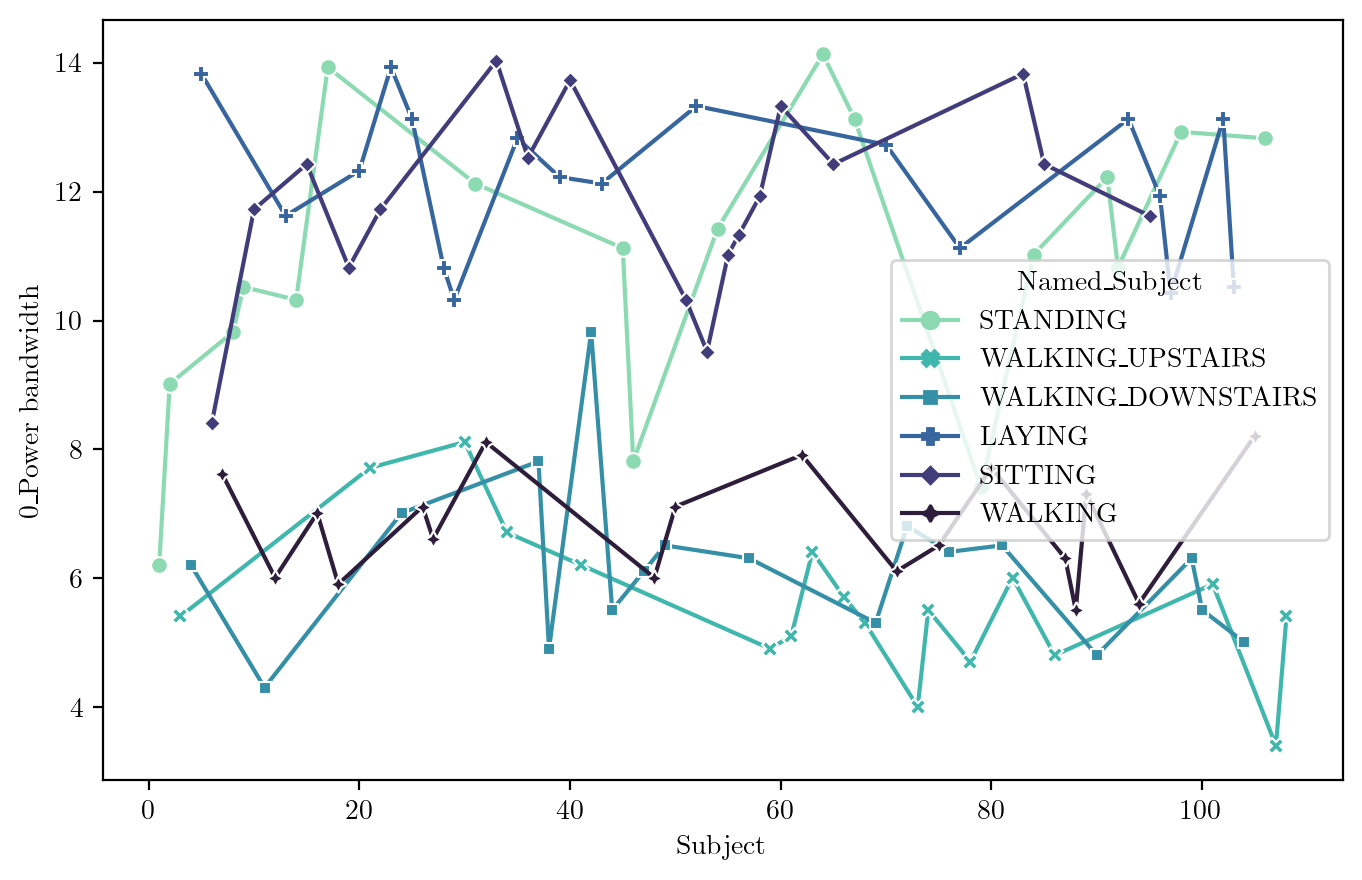

In [344]:
FeaturePlot(dfN, idx = 325)

## Signal Distance

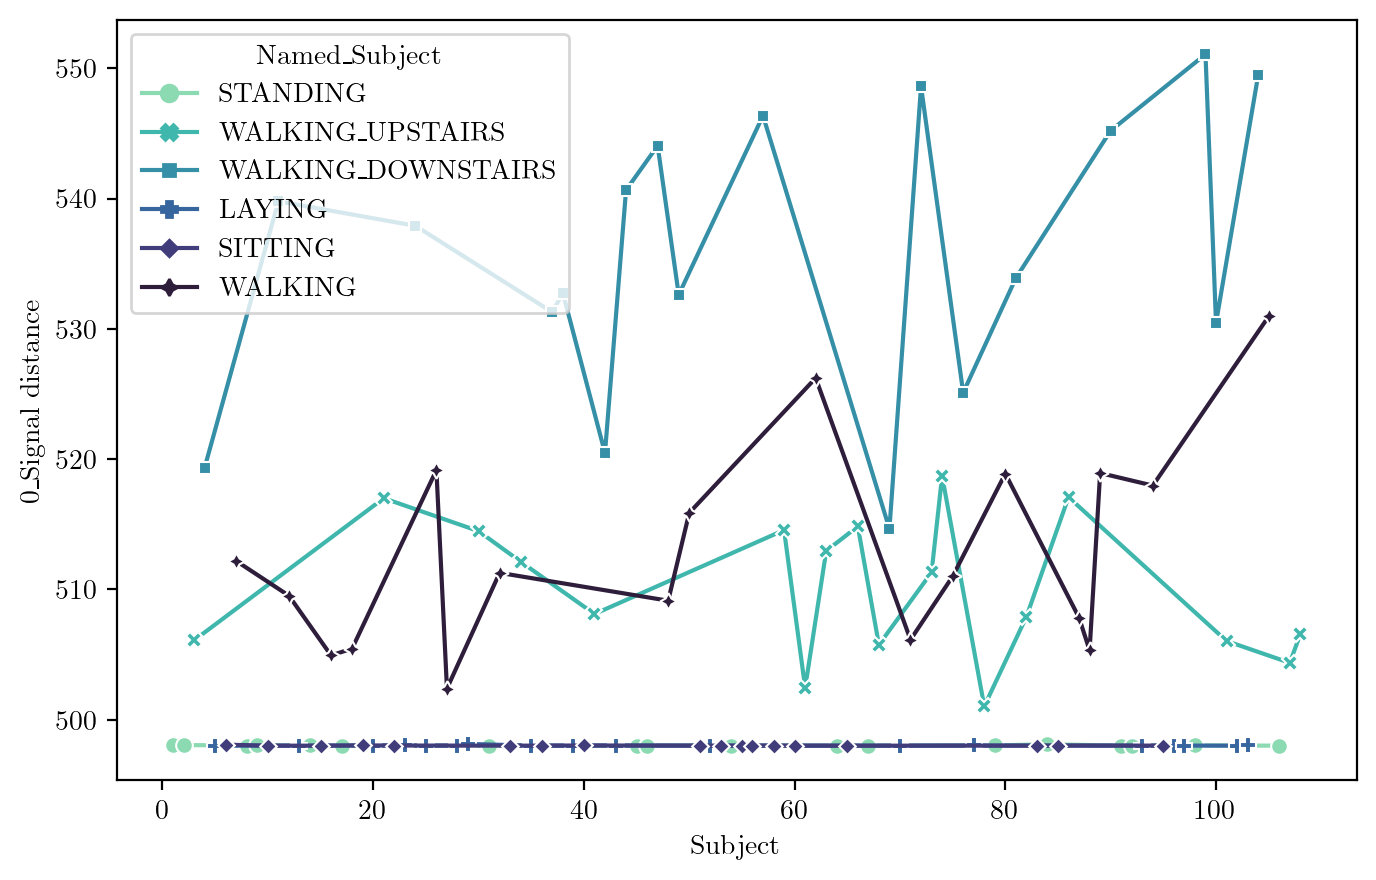

In [312]:
FeaturePlot(dfN, idx = 327)

## Negative Turning Point

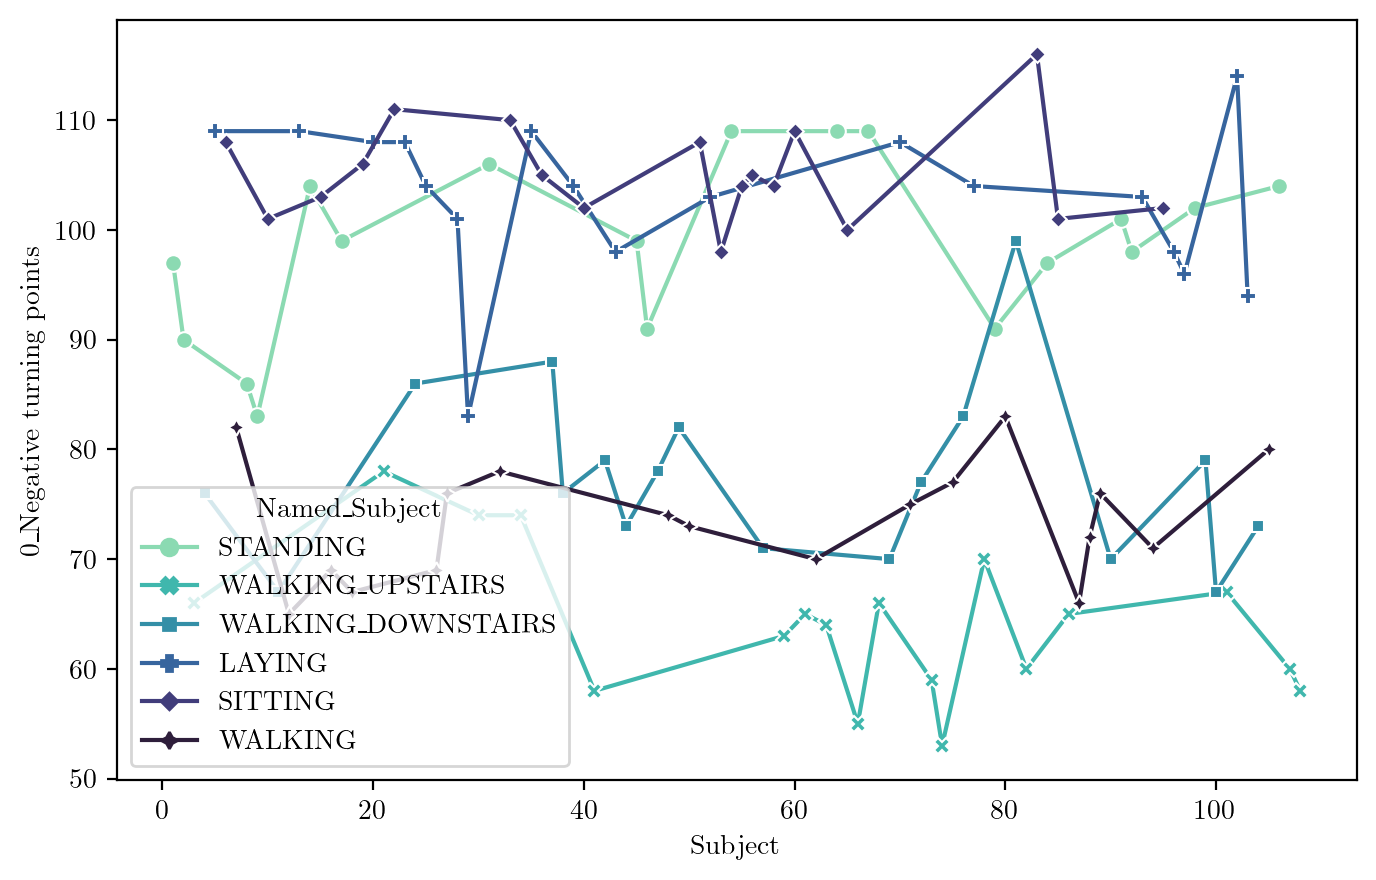

In [310]:
FeaturePlot(dfN, idx = 321)

## Maximum Frequency

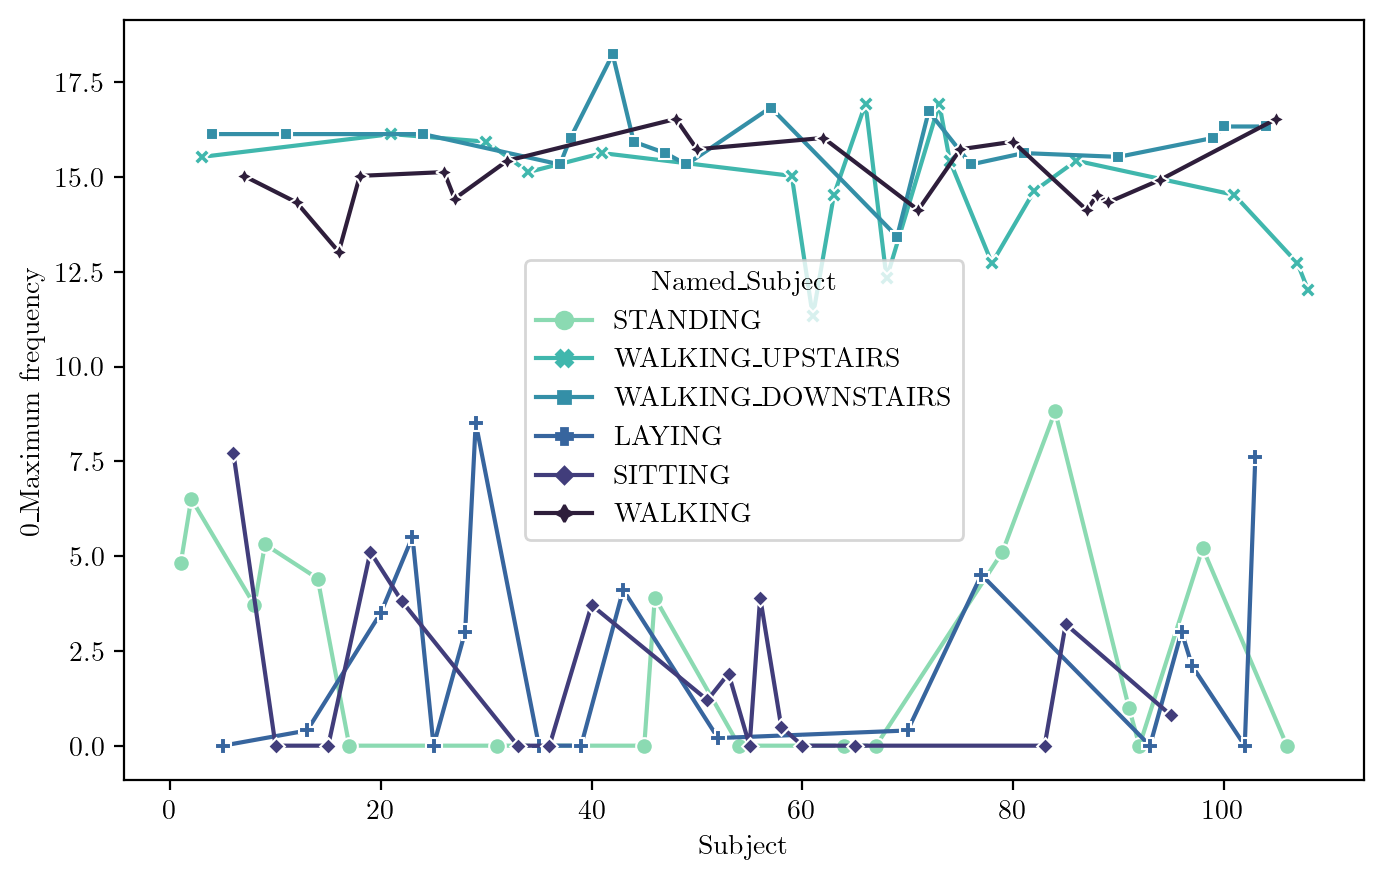

In [309]:
FeaturePlot(dfN, idx = 310)

## Area under Curve

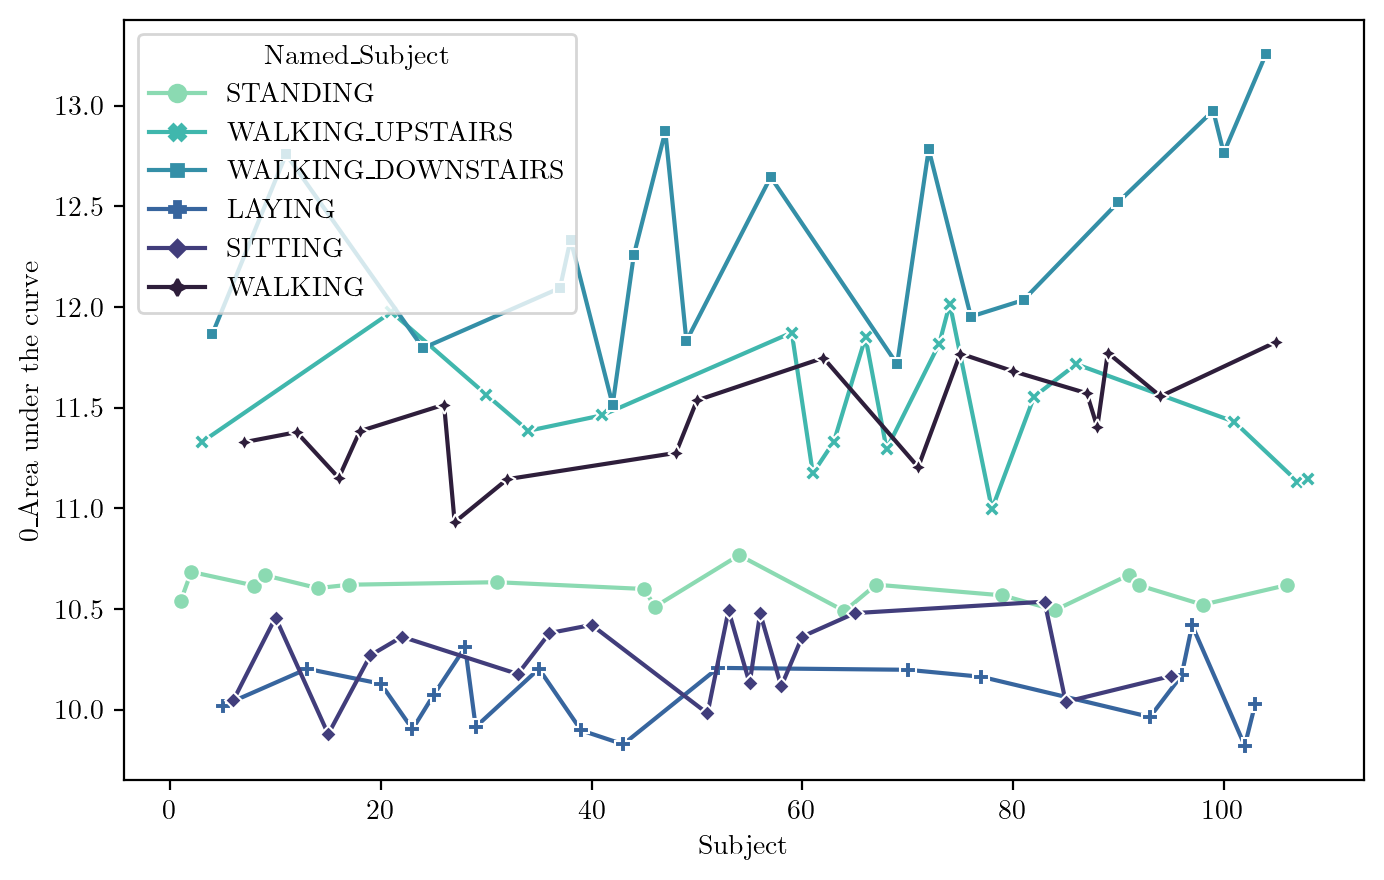

In [240]:
FeaturePlot(dfN, feature = features_sel[0])

## Mean

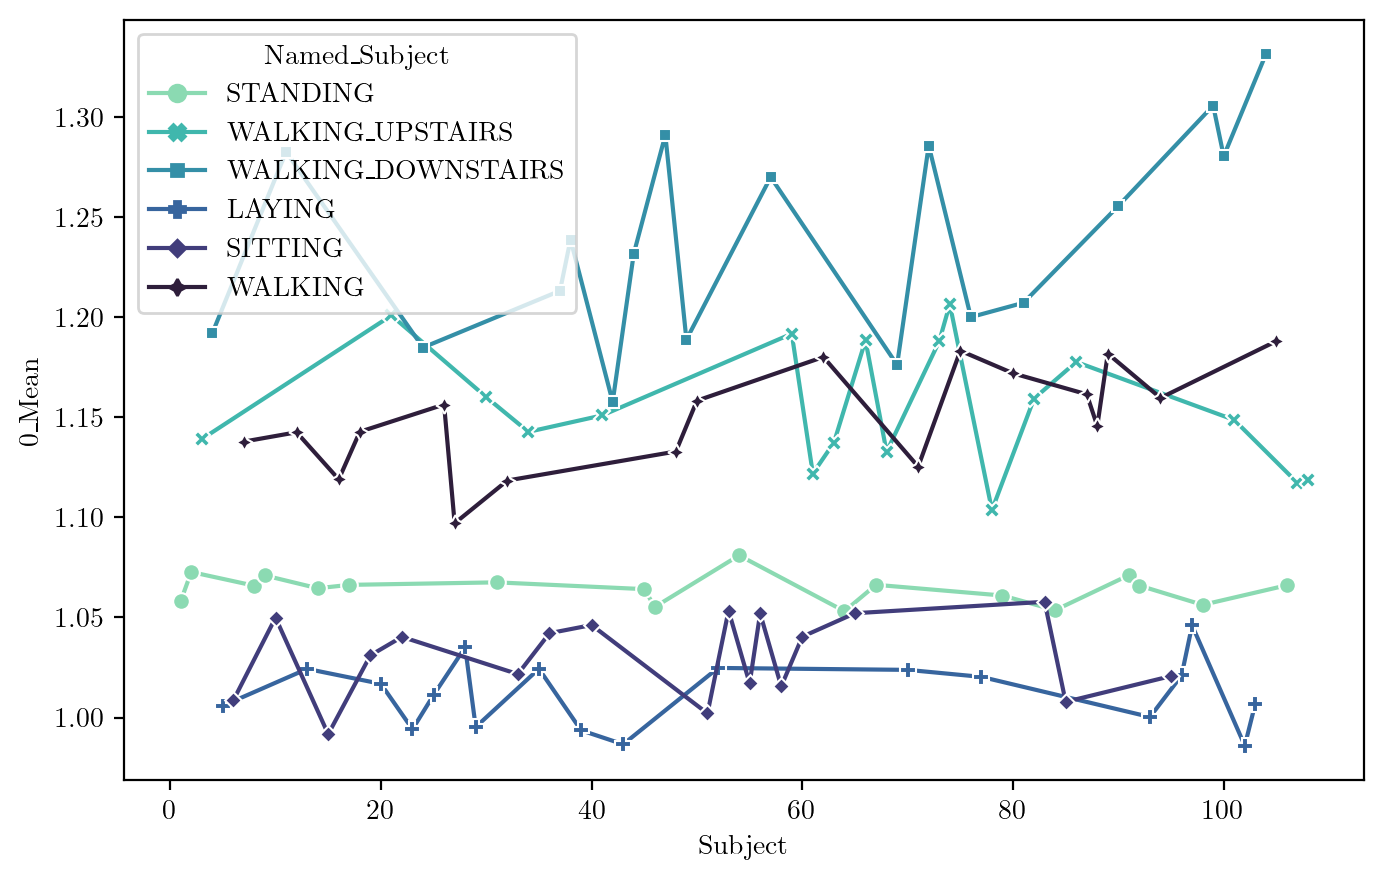

In [241]:
FeaturePlot(dfN, feature = features_sel[1])

## Variance

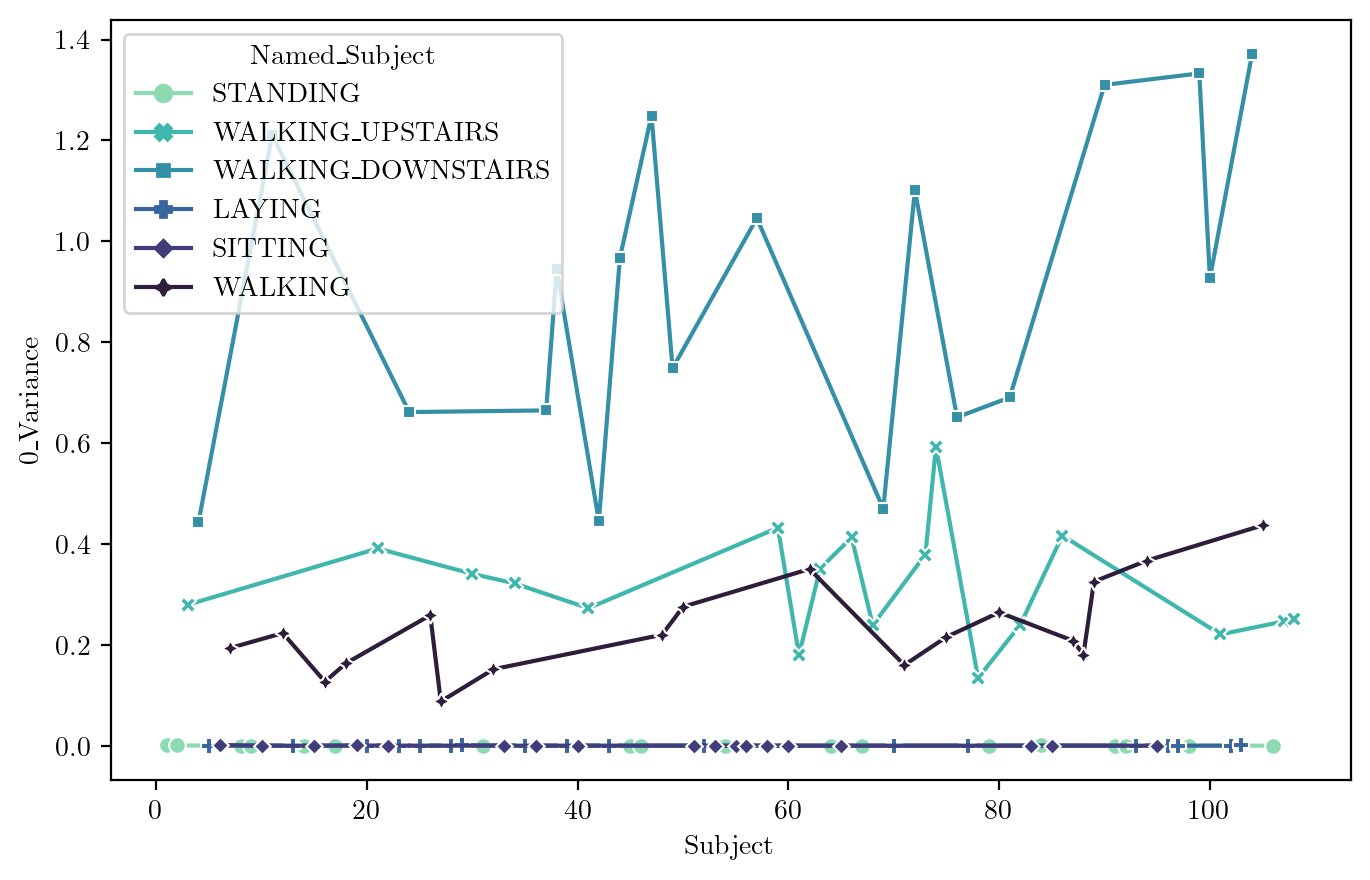

In [242]:
FeaturePlot(dfN, feature = features_sel[2])

## TIME SERIES PEAK-TO-PEAK DISTANCE

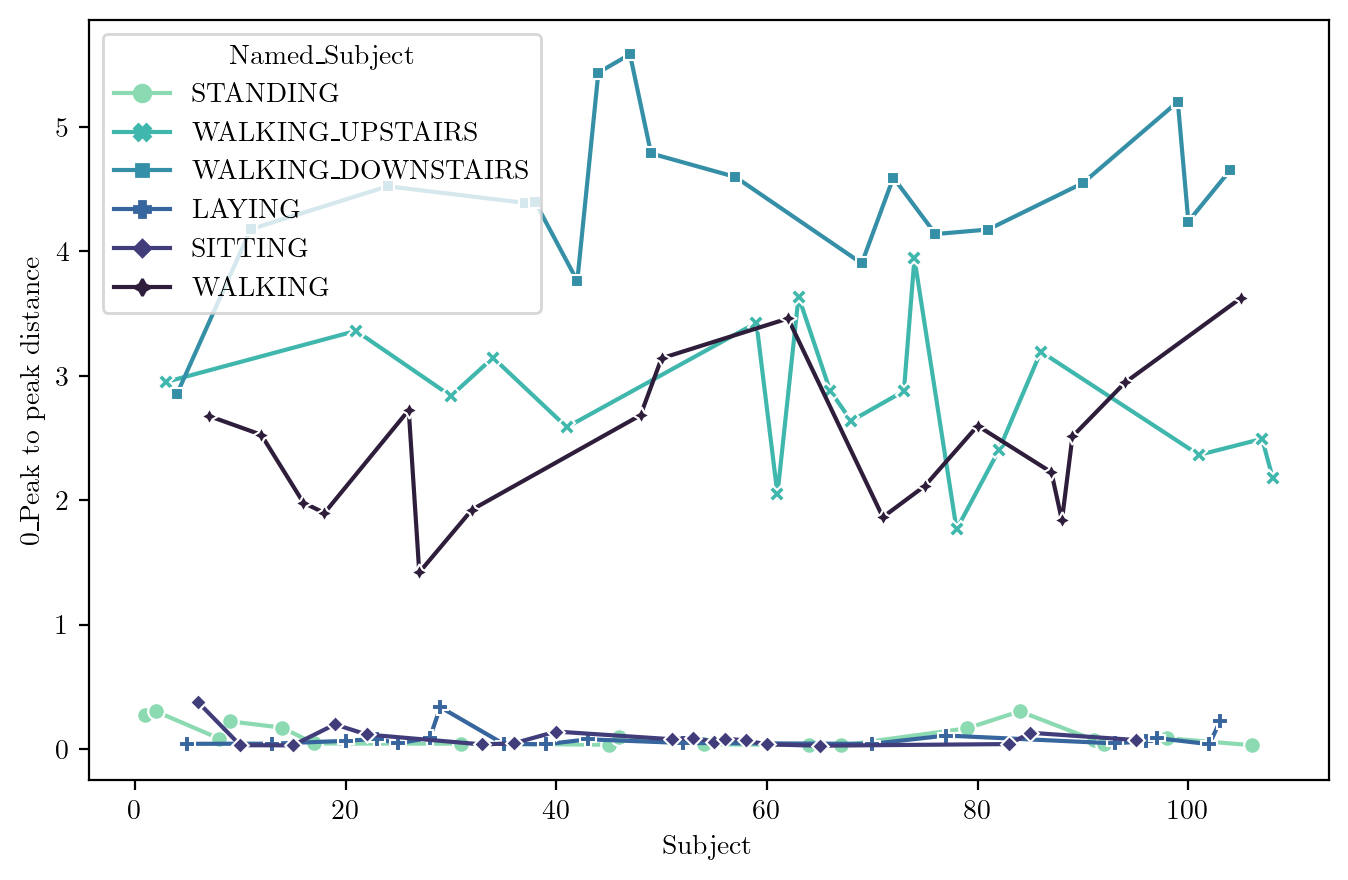

In [243]:
FeaturePlot(dfN, feature = features_sel[3])

## Mean Absolute Deviation

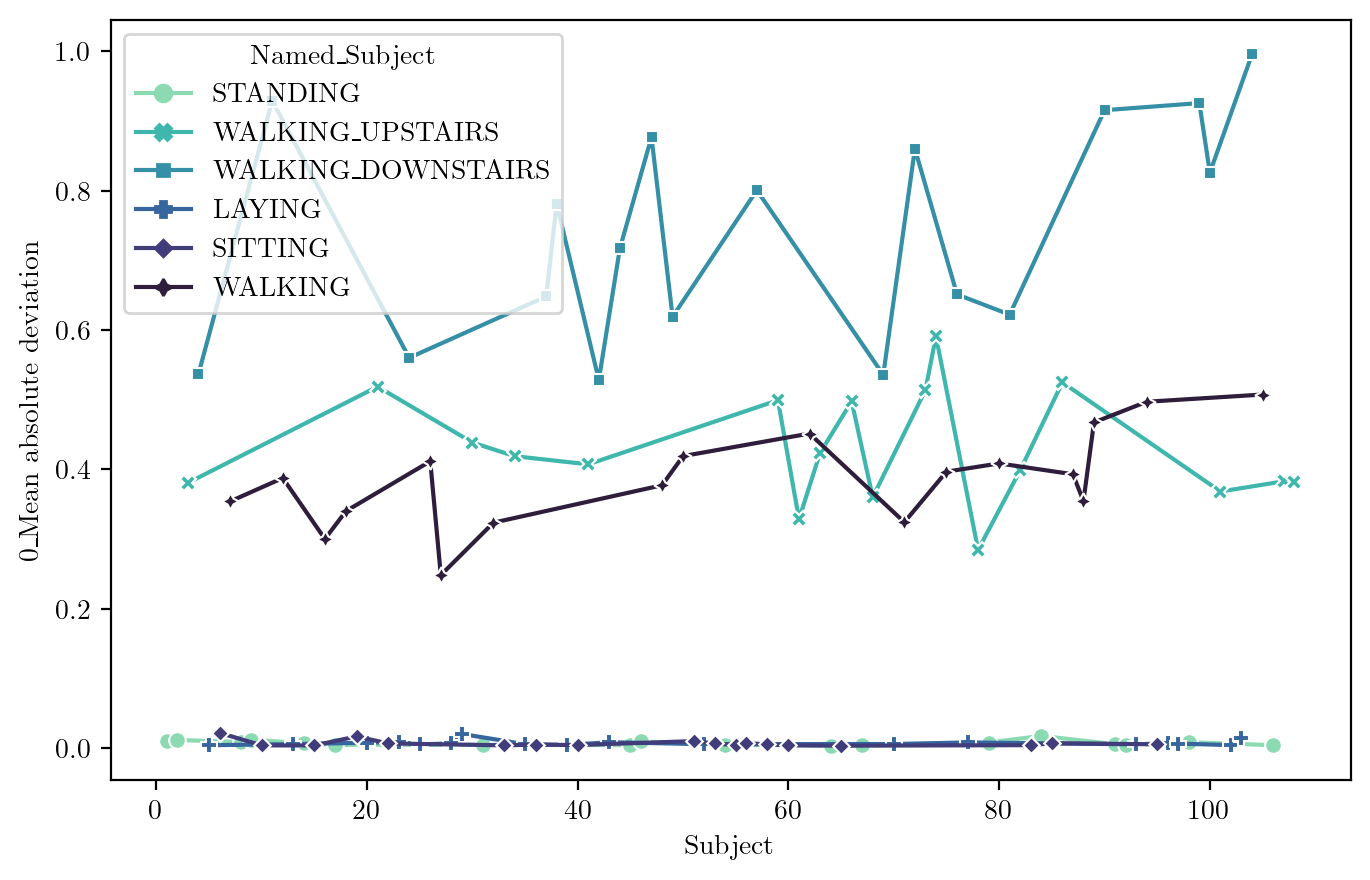

In [244]:
FeaturePlot(dfN, feature = features_sel[4])

### Our Selected Features
* Mean
* Area under Curve
* Peak-to-Peak Distance
* Variance
* Mean Absolute Deviation
* Maximum Frequency
> Newly Added
* 0_Power bandwidth
* 0_Spectral centroid
* 0_Spectral decrease
* 0_Spectral distance
* 0_Spectral entropy
* 0_Spectral kurtosis
* 0_Spectral positive turning points
* 0_Spectral roll-off
* 0_Spectral roll-on
* 0_Spectral skewness
* 0_Spectral slope
* 0_Spectral spread
* 0_Spectral variation

### Let's add some spectral features too to the 5 already selected -> **18 Featured Data**

In [345]:
f_sel = ["0_Area under the curve", "0_Mean", "0_Variance", "0_Peak to peak distance", "0_Mean absolute deviation", "0_Power bandwidth", "0_Spectral centroid", "0_Spectral decrease", "0_Spectral distance", "0_Spectral entropy", "0_Spectral kurtosis", "0_Spectral positive turning points", "0_Spectral roll-off", "0_Spectral roll-on", "0_Spectral skewness", "0_Spectral slope", "0_Spectral spread", "0_Spectral variation", "Labels", "Subject", "Named_Subject"]
dfFeat = dfN[f_sel]
dfFeat

,0_Area under the curve,0_Mean,0_Variance,0_Peak to peak distance,0_Mean absolute deviation,0_Power bandwidth,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,...,0_Spectral positive turning points,0_Spectral roll-off,0_Spectral roll-on,0_Spectral skewness,0_Spectral slope,0_Spectral spread,0_Spectral variation,Labels,Subject,Named_Subject
0,10.539676,1.058197,0.000441,0.276308,0.010246,6.212425,0.639077,-46.590172,-70826.079944,0.727967,...,73.0,4.809619,0.0,4.906914,-0.000905,2.304270,0.903439,5,1,STANDING
0,10.683732,1.072680,0.000440,0.302652,0.011577,9.018036,0.850078,-41.721346,-71473.612034,0.781145,...,72.0,6.513026,0.0,4.151249,-0.000889,2.828170,0.951706,5,2,STANDING
0,11.328686,1.139029,0.279613,2.951101,0.380676,5.410822,3.887285,-2.433189,-169599.425066,0.547602,...,78.0,15.531062,0.0,1.869257,-0.000657,5.062929,0.735493,2,3,WALKING_UPSTAIRS
0,11.865417,1.191914,0.442988,2.853736,0.537075,6.212425,4.521254,-1.803868,-204731.964203,0.592184,...,80.0,16.132265,0.0,1.632312,-0.000608,5.077597,0.698450,3,4,WALKING_DOWNSTAIRS
0,10.018665,1.005892,0.000026,0.042222,0.004001,13.827655,0.281477,-151.116426,-63806.084893,0.806408,...,79.0,0.000000,0.0,7.583021,-0.000933,1.753868,0.851520,6,5,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,13.254750,1.331151,1.370835,4.655614,0.995919,5.010020,4.916563,-1.218502,-294434.103156,0.565975,...,78.0,16.332665,0.0,1.444425,-0.000578,5.130396,0.469507,3,104,WALKING_DOWNSTAIRS
0,11.826549,1.187985,0.436927,3.625210,0.507468,8.216433,5.361472,-2.037178,-167545.154695,0.492424,...,81.0,16.533066,0.0,1.054264,-0.000544,5.306712,0.819865,1,105,WALKING
0,10.618080,1.066065,0.000026,0.031092,0.004030,12.825651,0.275996,-158.072078,-67537.987024,0.818778,...,87.0,0.000000,0.0,7.708759,-0.000933,1.746586,0.950194,5,106,STANDING
0,11.132367,1.117178,0.246346,2.492894,0.382848,3.406814,3.119947,-2.902698,-160379.192325,0.469127,...,81.0,12.725451,0.0,1.982978,-0.000716,4.165671,0.738380,2,107,WALKING_UPSTAIRS


### PCA on 18 Featured Data

In [347]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfFeat.iloc[:, :-3])
model = PCA(n_components = 2)
X_trainFeat_2D = model.fit_transform(X_scaled)
dfPCAFeat = pd.DataFrame(X_trainFeat_2D)
dfPCAFeat["Labels"] = y_train
dfPCAFeat

,0,1,Labels
0,-2.119269,1.516116,5
1,-1.979877,1.739336,5
2,2.746499,0.798706,2
3,3.579078,-0.146838,3
4,-4.607082,-0.719782,6
...,...,...,...
103,6.670144,-2.509504,3
104,3.678577,0.154650,1
105,-4.411194,-1.856612,5
106,2.263685,0.657534,2


## 18 Featured Data PCA to 2D

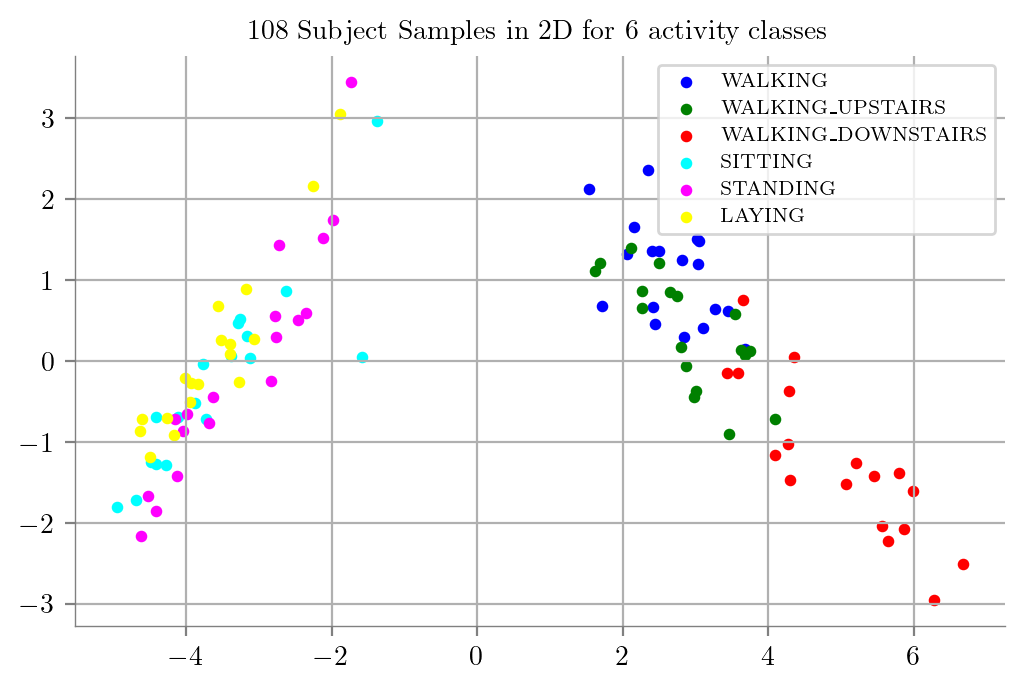

In [348]:
PCA_Plot(dfPCAFeat)

### Extracting DataFrame for our 5 featurized Data

### Featurized DataFrame

In [263]:
dfNewFeaturized = dfN[features_sel]
dfNewFeaturized

,0_Area under the curve,0_Mean,0_Variance,0_Peak to peak distance,0_Mean absolute deviation,Labels,Subject,Named_Subject
0,10.539676,1.058197,0.000441,0.276308,0.010246,5,1,STANDING
0,10.683732,1.072680,0.000440,0.302652,0.011577,5,2,STANDING
0,11.328686,1.139029,0.279613,2.951101,0.380676,2,3,WALKING_UPSTAIRS
0,11.865417,1.191914,0.442988,2.853736,0.537075,3,4,WALKING_DOWNSTAIRS
0,10.018665,1.005892,0.000026,0.042222,0.004001,6,5,LAYING
...,...,...,...,...,...,...,...,...
0,13.254750,1.331151,1.370835,4.655614,0.995919,3,104,WALKING_DOWNSTAIRS
0,11.826549,1.187985,0.436927,3.625210,0.507468,1,105,WALKING
0,10.618080,1.066065,0.000026,0.031092,0.004030,5,106,STANDING
0,11.132367,1.117178,0.246346,2.492894,0.382848,2,107,WALKING_UPSTAIRS


### PCA on our chosen 5 Featurized Data

In [330]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfNewFeaturized.iloc[:, :-3])
model = PCA(n_components = 2)
X_trainOurF_2D = model.fit_transform(X_scaled)
dfPCAFeat = pd.DataFrame(X_trainFeat_2D)
dfPCAFeat["Labels"] = y_train
dfPCAFeat

,0,1,Labels
0,-2.408634,1.329825,5
1,-2.039138,1.697191,5
2,2.543982,0.746600,2
3,3.471005,-0.131893,3
4,-4.349947,-0.661725,6
...,...,...,...
103,6.572669,-2.406062,3
104,3.731875,0.248615,1
105,-4.227187,-1.883089,5
106,1.883058,0.470228,2


In [252]:
dfPCAOurF = pd.DataFrame(X_trainOurF_2D)
dfPCAOurF["Labels"] = y_train
dfPCAOurF

,0,1,Labels
0,-1.591114,-0.091353,5
1,-1.427712,-0.222992,5
2,0.880008,-0.234883,2
3,1.874859,-0.287865,3
4,-2.220049,0.391626,6
...,...,...,...
103,5.704453,0.657241,3
104,1.976794,-0.320237,1
105,-1.580248,-0.149378,5
106,0.502482,-0.098926,2


## 5 Featurized PCA datapoints

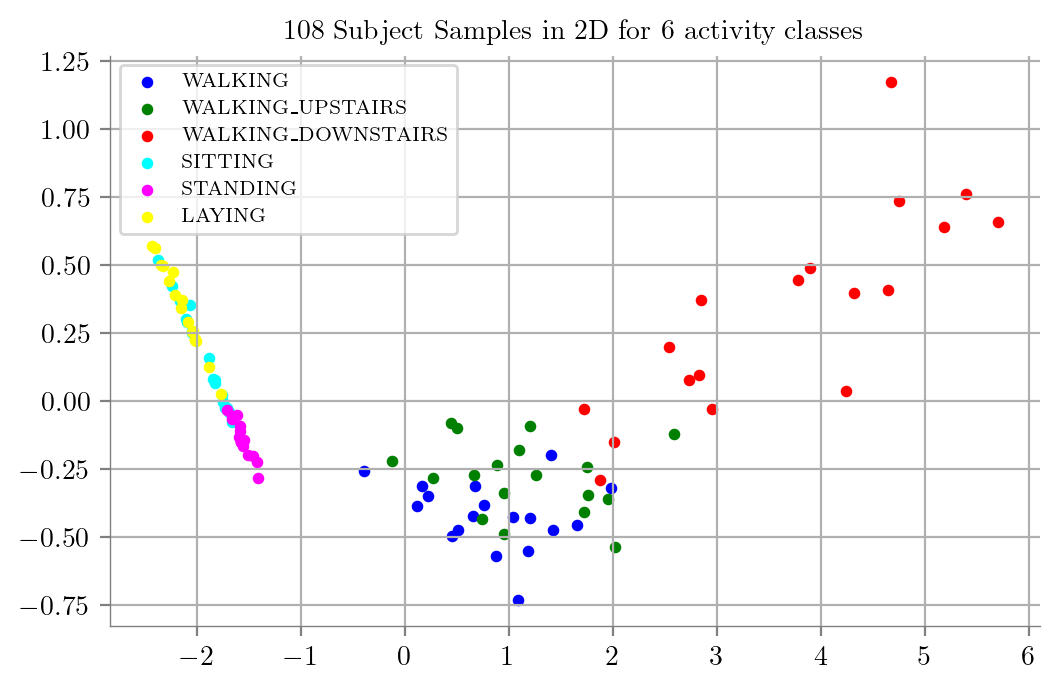

In [254]:
PCA_Plot(dfPCAOurF)

### PCA on our raw timeseries data

In [251]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_TS)
model = PCA(n_components = 2)
X_train_2D = model.fit_transform(X_scaled)

In [255]:
dfPCA = pd.DataFrame(X_train_2D)
dfPCA["Labels"] = y_train
dfPCA

,0,1,Labels
0,0.171000,-0.058009,5
1,-0.008648,0.128133,5
2,2.803362,2.955462,2
3,2.856289,-7.198528,3
4,0.192954,-0.168915,6
...,...,...,...
103,6.098028,41.782163,3
104,-4.212006,8.896049,1
105,0.105575,0.038338,5
106,2.634434,0.671926,2


## Raw Timeseries PCA datapoints

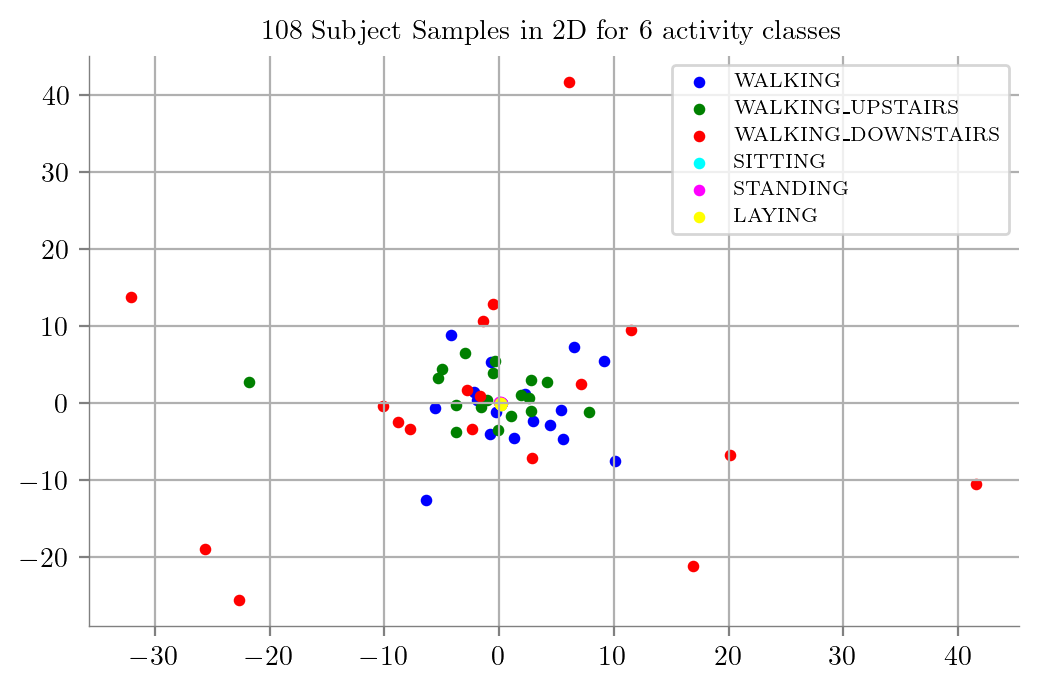

In [256]:
PCA_Plot(dfPCA)

### PCA on entire 383 Featurized Data

In [257]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfN.iloc[:, :-3])
model = PCA(n_components = 2)
X_trainF_2D = model.fit_transform(X_scaled)

In [258]:
dfPCAF = pd.DataFrame(X_trainF_2D)
dfPCAF["Labels"] = y_train
dfPCAF

,0,1,Labels
0,-9.656330,1.259515,5
1,-9.507877,1.189473,5
2,0.904597,-3.530496,2
3,9.379393,-3.324217,3
4,-10.632995,2.040261,6
...,...,...,...
103,34.743740,3.095295,3
104,14.424106,-3.185719,1
105,-10.430969,1.901364,5
106,-0.354879,-4.074157,2


## 383 Featurized PCA Datapoints

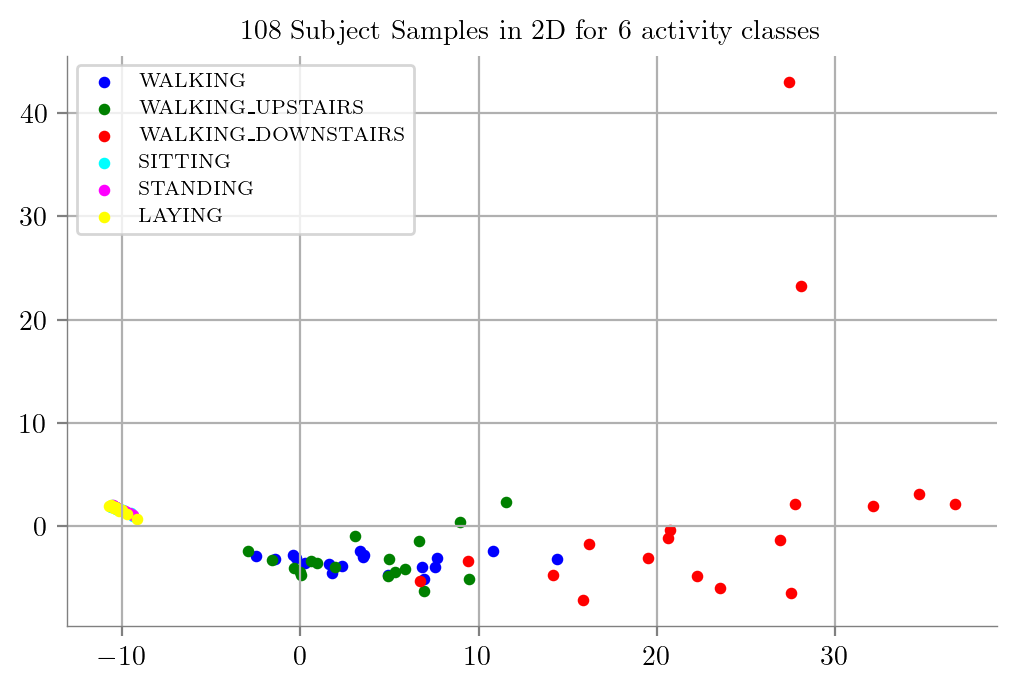

In [259]:
PCA_Plot(dfPCAF)

# TESTING PART

## ```dfNewFeaturized``` has $5$ selected features and ```dfFeat``` has $18$ selected features

## Template Funtion to Featurize a Dataset

In [260]:
def Featuriser(XTimeSeries, YTimeSeries, features):
    cfg = tsfel.get_features_by_domain()
    df = pd.DataFrame(XTimeSeries)
    dataFrames = []
    for i in df.index:
        dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i,:], fs = 50))
    dfN = pd.concat(dataFrames, axis = 0)
    dfN["Labels"] = YTimeSeries
    namedLabel = [classesN[i] for i in YTimeSeries]
    dfN["Named_Subject"] = namedLabel
    dfN["Subject"] = range(1, len(XTimeSeries) + 1)
    dfNFeaturized = dfN[features]
    return dfNFeaturized

### The features we wish to select for our dataframe

In [350]:
# 5 Features
features_sel = ["0_Area under the curve", "0_Mean", "0_Variance", "0_Peak to peak distance", "0_Mean absolute deviation", "Labels", "Subject", "Named_Subject"]

# 18 Features
f_sel = ["0_Area under the curve", "0_Mean", "0_Variance", "0_Peak to peak distance", "0_Mean absolute deviation", "0_Power bandwidth", "0_Spectral centroid", "0_Spectral decrease", "0_Spectral distance", "0_Spectral entropy", "0_Spectral kurtosis", "0_Spectral positive turning points", "0_Spectral roll-off", "0_Spectral roll-on", "0_Spectral skewness", "0_Spectral slope", "0_Spectral spread", "0_Spectral variation", "Labels", "Subject", "Named_Subject"]

### Featurizing the TEST dataset for our chosen $5$ features

In [ ]:
dfNF_test = Featuriser(X_test_TS, y_test, features_sel)

## Decision Tree Classifier on our 5 Featurized Data

## Classifier for $5$ Featured ```dfNewFeaturized```

In [264]:
model = DecisionTreeClassifier()
clfg = model.fit(dfNewFeaturized.iloc[:, :-3], dfNewFeaturized.iloc[:, 5])
y_pred = clfg.predict(dfNF_test.iloc[:, :-3])
y_pred

array([3, 3, 6, 2, 6, 5, 6, 1, 2, 3, 5, 6, 2, 5, 2, 4, 5, 5, 1, 6, 5, 1,
       2, 5, 2, 1, 2, 4, 3, 6, 4, 6, 4, 2, 3, 1])

In [265]:
y_test

array([3, 3, 6, 2, 6, 5, 6, 1, 1, 3, 5, 6, 1, 5, 3, 4, 5, 5, 1, 6, 4, 1,
       2, 5, 2, 1, 3, 6, 3, 4, 4, 4, 4, 2, 2, 2])

### Accuracy Score for decision tree classifier on TEST data trained on our 5 featurized dataset

In [266]:
accuracy_score(y_test, y_pred)

0.7222222222222222

### Classification Report for decision tree classifier on TEST data trained on our 5 featurized dataset

In [267]:
print(classification_report(y_test, y_pred, labels = np.unique(y_pred)))

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.50      0.67      0.57         6
           3       0.80      0.67      0.73         6
           4       0.75      0.50      0.60         6
           5       0.86      1.00      0.92         6
           6       0.71      0.83      0.77         6

    accuracy                           0.72        36
   macro avg       0.74      0.72      0.72        36
weighted avg       0.74      0.72      0.72        36



### Confusion Matrix for the above prediction

In [270]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes])
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,4,2,0,0,0,0
WALKING_UPSTAIRS,1,4,1,0,0,0
WALKING_DOWNSTAIRS,0,2,4,0,0,0
SITTING,0,0,0,3,1,2
STANDING,0,0,0,0,6,0
LAYING,0,0,0,1,0,5


## Template Code for Displaying Confusion Matrix

In [271]:
## flag = 1 for a single plot and 0 for subplots for 2 - 8 depths
def confMatrix(dataFrame, flag = 1, accuracies = None):
    if flag:
        plt.figure(figsize = (6, 6))
        ax = sns.heatmap(dataFrame, annot = True, cmap = "PuBu")
        plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 8)
        plt.setp(ax.get_yticklabels(), fontsize = 8)
        plt.ylabel("True label", fontsize = 18)
        plt.xlabel("Predicted label", fontsize = 18)
        plt.title(f"Accuracy = {accuracy_score(y_test, y_pred)*100: .4f}%", fontweight = "bold", fontsize = 13)
        plt.show()
    else:
        fig, axes = plt.subplots(3, 3, figsize = (25, 25))
        axes = axes.flatten()

        for i, df in enumerate(dataFrame):
            ax = sns.heatmap(df, annot = True, ax = axes[i], cbar = False, cmap = "PuBu")
            
            plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 6)
            plt.setp(ax.get_yticklabels(), fontsize = 8)
            ax.set_title(f"Depth = {i + 2}\nAccuracy = {accuracies[i] * 100: .4f}%", fontsize = 10)
            ax.set_ylabel("True label", fontsize = 12)
            ax.set_xlabel("Predicted label", fontsize = 12)
            
        plt.delaxes(axes[7])
        plt.delaxes(axes[8])
        plt.tight_layout()
        plt.subplots_adjust(wspace = 1.1, hspace = 1.1)
        plt.show()

### Confusion Matrix for the model trained on our 5-featured Dataset

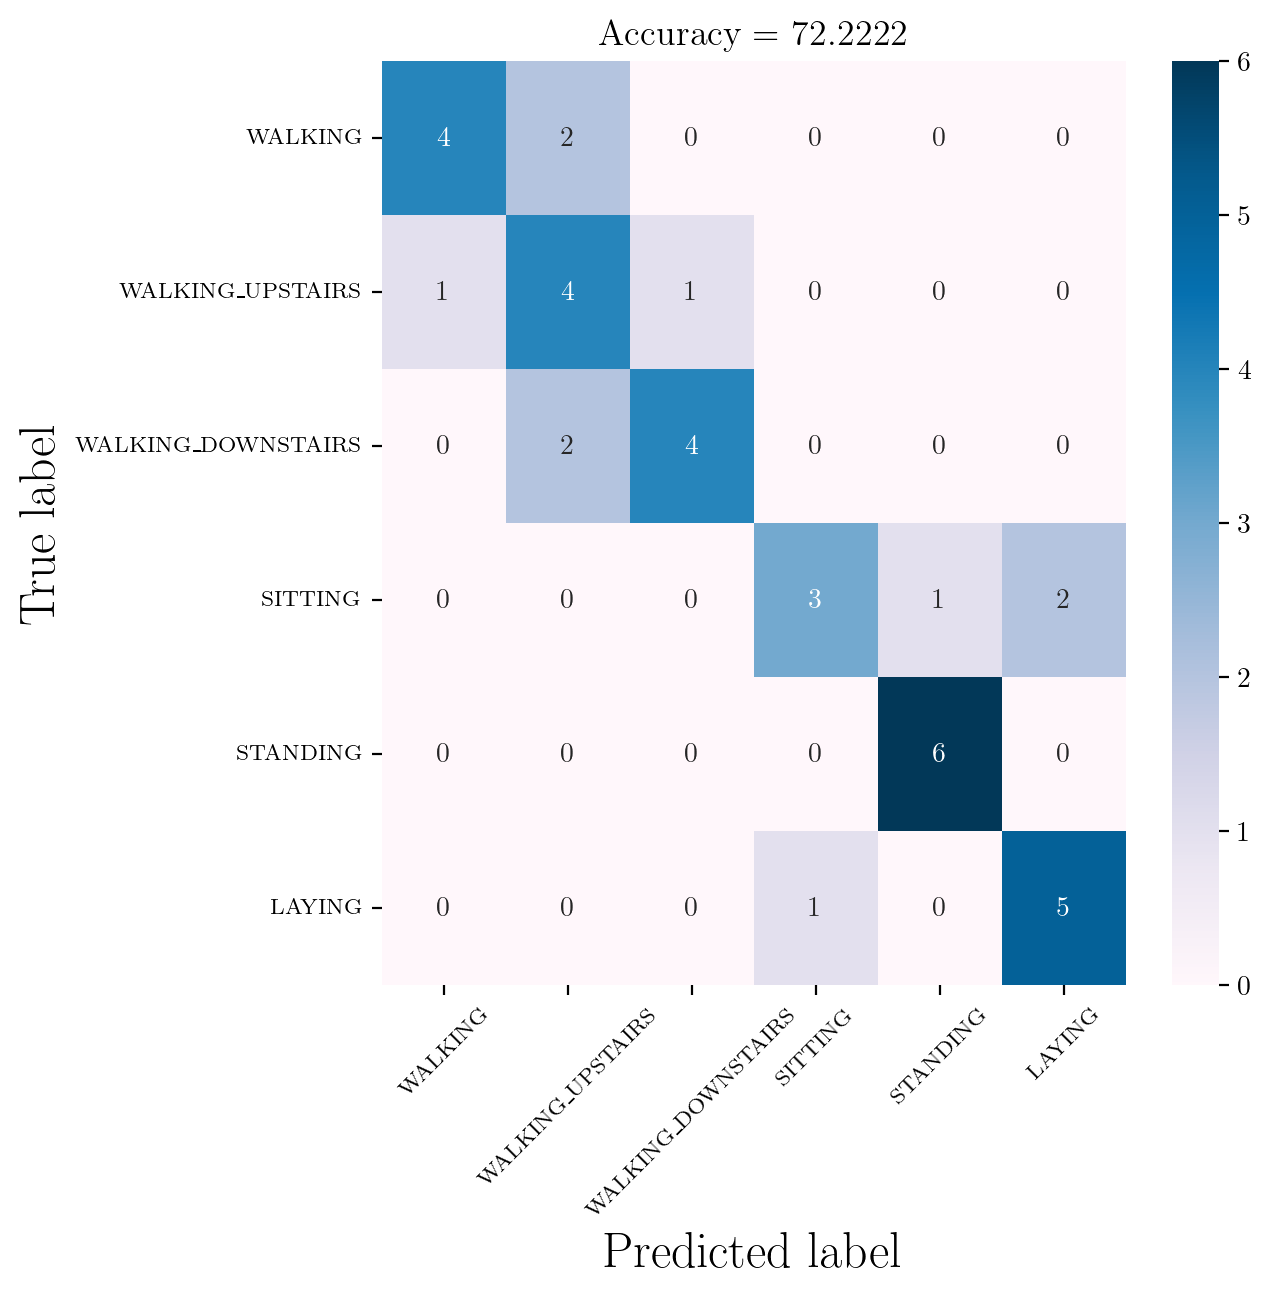

In [272]:
confMatrix(df_cm, flag = 1)

### Fetching the Connfusion Matrices, Class Reports, Accuracies for Depth $(2 - 8)$ Tree on **5-Featurized Data**

In [273]:
confusion_matrices, class_reports, class_reports_dict, accuracies = [], [], [], []
for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i, random_state = 42)
    clfg = model.fit(dfNewFeaturized.iloc[:, :-3], dfNewFeaturized.iloc[:, 5])
    y_pred = clfg.predict(dfNF_test.iloc[:, :-3])
    
    pred, actual = y_pred, y_test
    
    cm = confusion_matrix(actual, pred)
    
    confusion_matrices.append(pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes]))
    class_reports.append(classification_report(actual, pred, labels = np.unique(pred)))
    class_reports_dict.append(classification_report(actual, pred, labels = np.unique(pred), output_dict = True))
    accuracies.append(accuracy_score(actual, pred))

### $7$ Confusion Matrices for **5-Featurized Data**

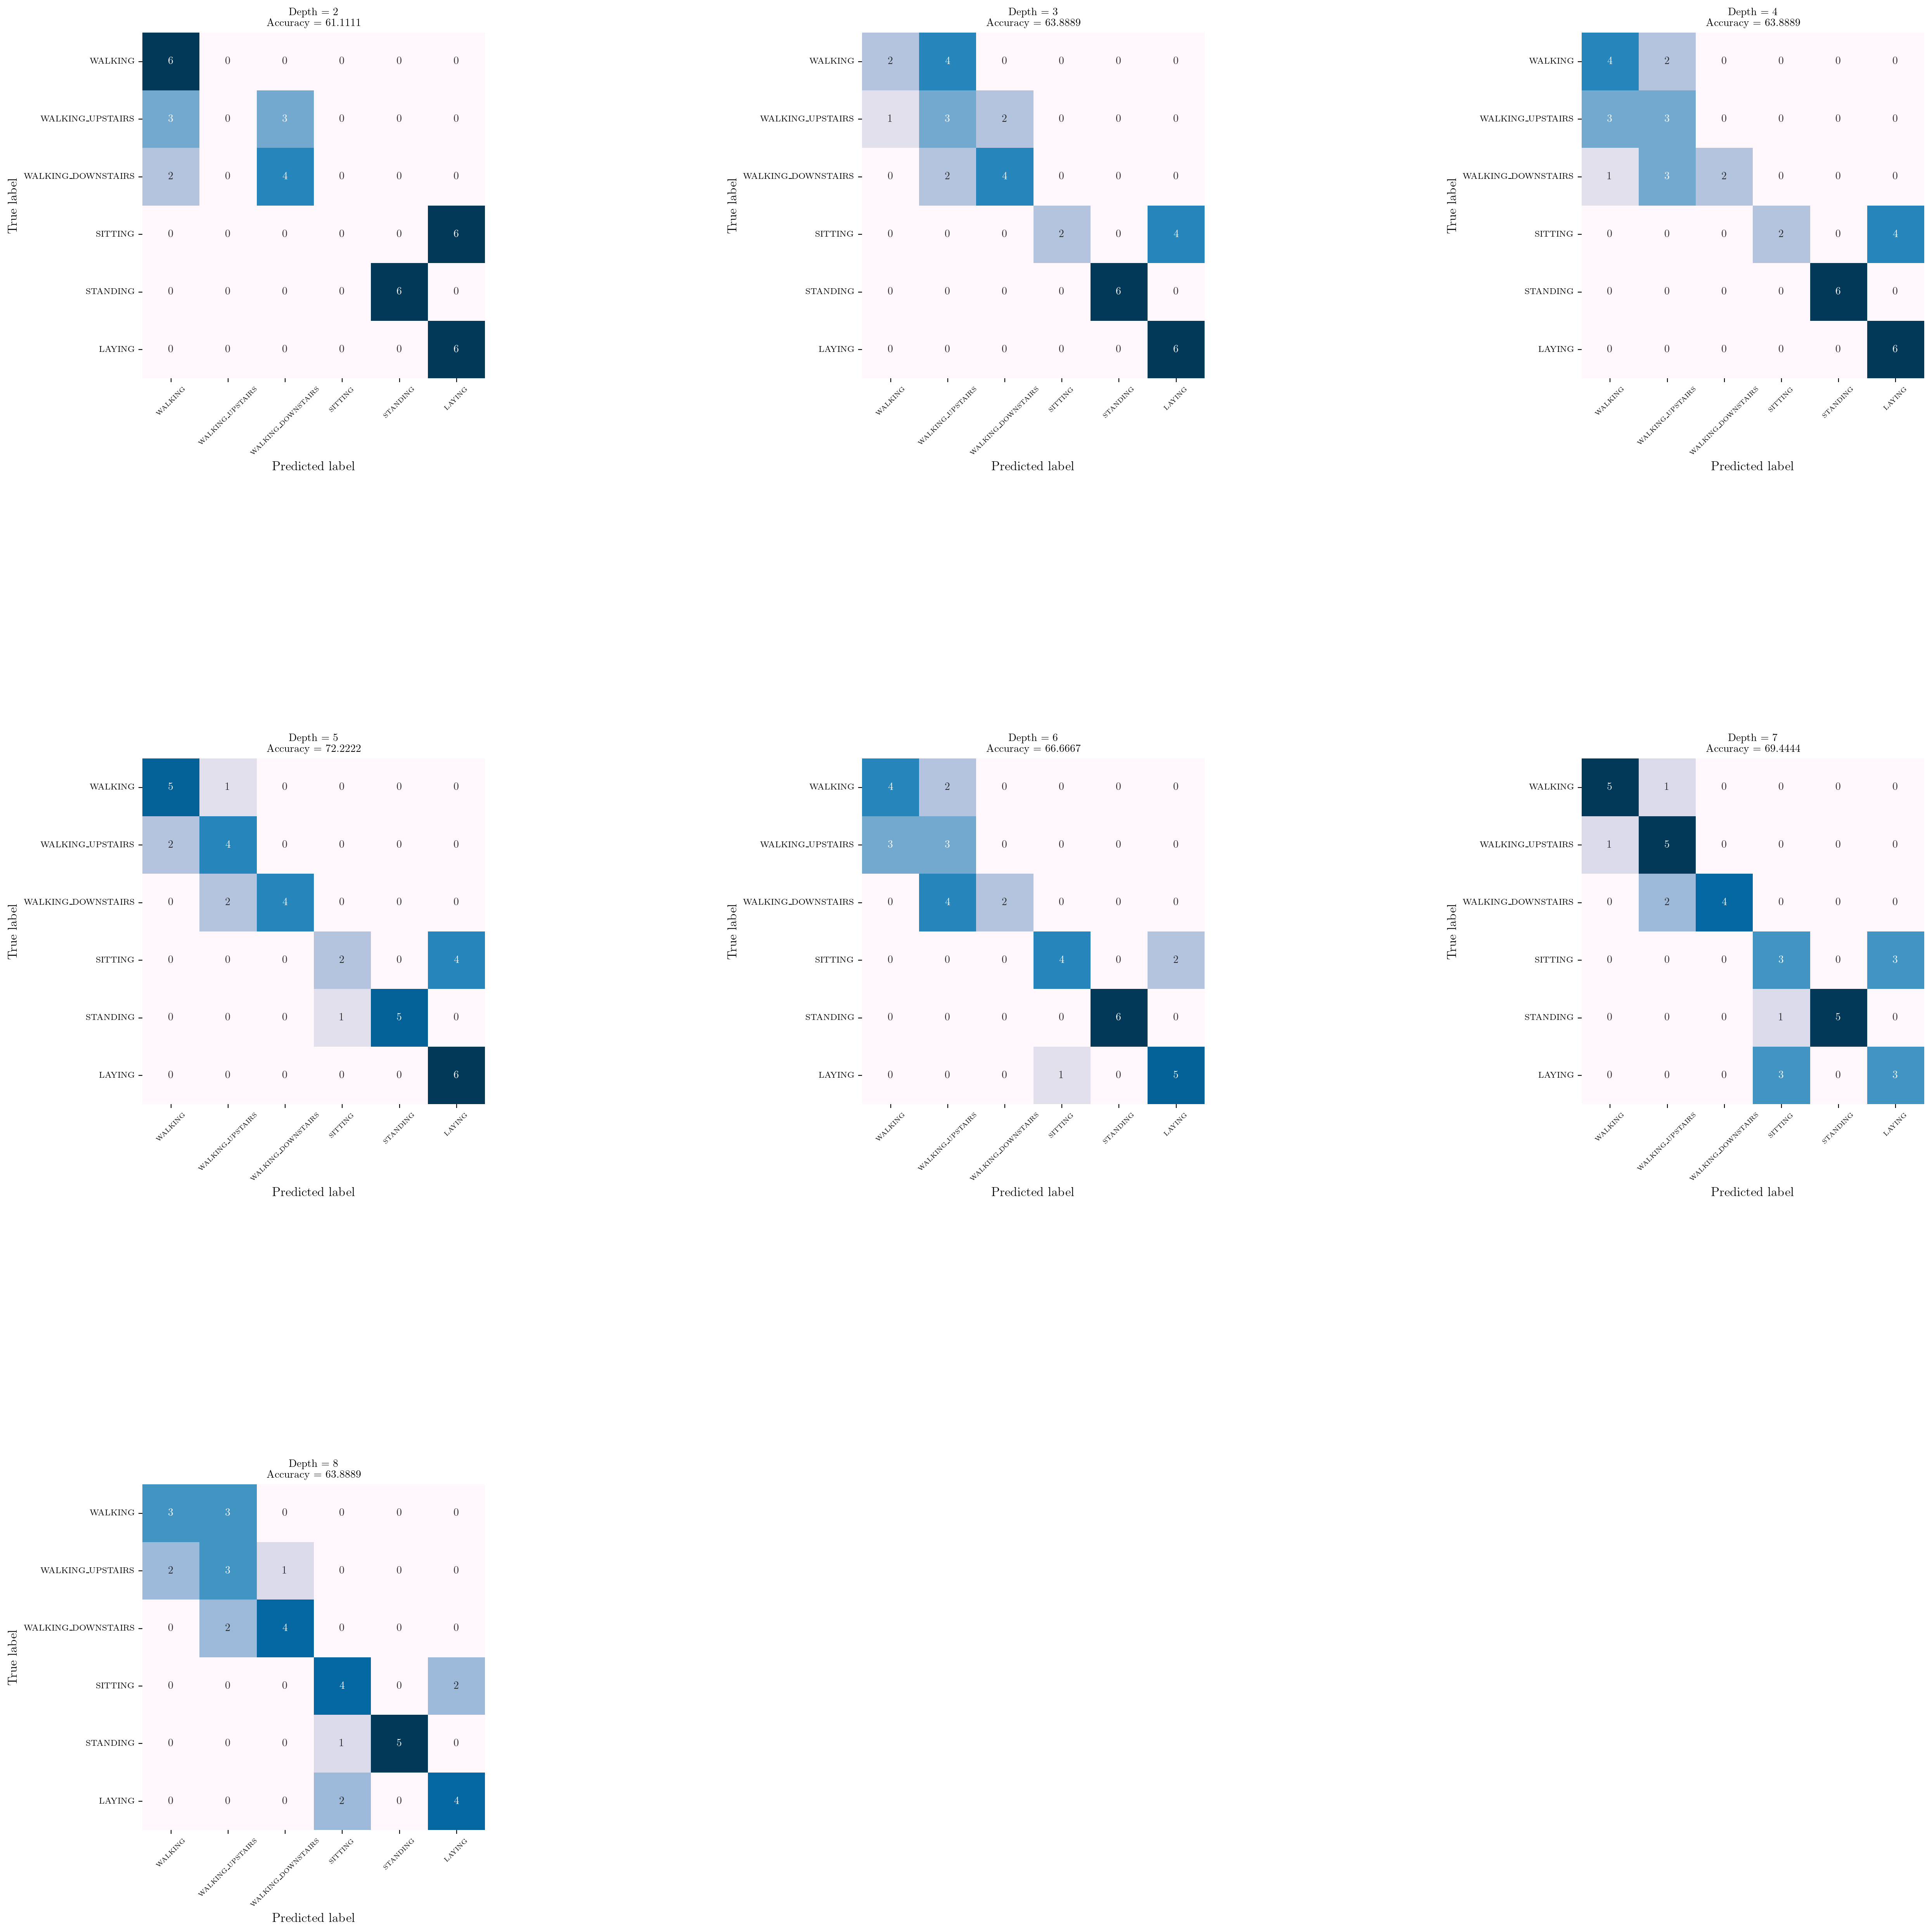

In [274]:
confMatrix(confusion_matrices, flag = 0, accuracies = accuracies)

## Decision Tree Classifier on RAW TimeSeries Data ```X_train_TS```

In [285]:
model = DecisionTreeClassifier()
clfg = model.fit(X_train_TS, y_train)
y_pred1 = clfg.predict(X_test_TS)
cm1 = confusion_matrix(y_test, y_pred1)
df_cm1 = pd.DataFrame(cm1, index = [classT for classT in classes], columns = [classT for classT in classes])
df_cm1

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,3,1,1,1,0,0
WALKING_UPSTAIRS,2,1,1,1,1,0
WALKING_DOWNSTAIRS,0,3,2,1,0,0
SITTING,0,0,0,4,0,2
STANDING,0,0,0,1,5,0
LAYING,0,0,0,5,0,1


### Confusion Matrix for the model trained on RAW TimeSeries Data

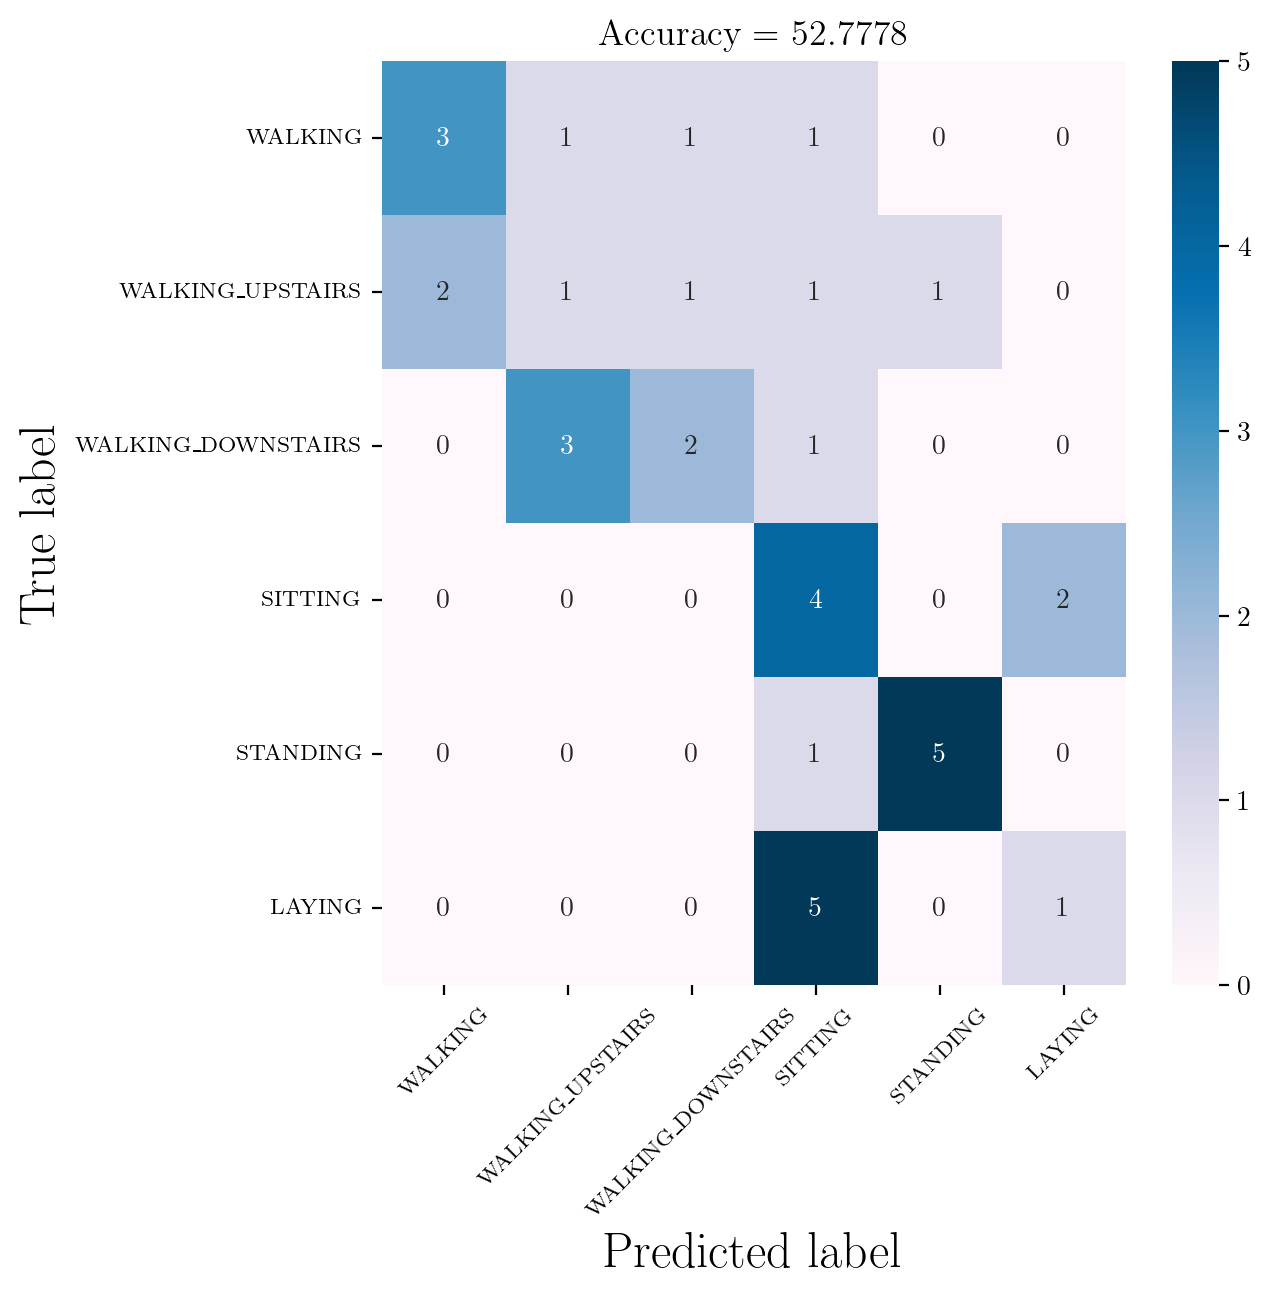

In [286]:
confMatrix(df_cm1, flag = 1)

### Fetching the Connfusion Matrices, Class Reports, Accuracies for Depth $(2 - 8)$ Tree on **Raw Time Series Data**

In [280]:
confusion_matrices1, class_reports1, class_reports_dict1, accuracies1 = [], [], [], []
for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i,random_state=42)
    clfg = model.fit(X_train_TS, y_train)
    y_pred = clfg.predict(X_test_TS)
    
    pred, actual = y_pred, y_test
    
    cm = confusion_matrix(actual, pred)
    
    confusion_matrices1.append(pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes]))
    class_reports1.append(classification_report(actual, pred, labels = np.unique(pred)))
    class_reports_dict1.append(classification_report(actual, pred, labels = np.unique(pred), output_dict = True))
    accuracies1.append(accuracy_score(actual, pred))

### $7$ Confusion Matrices for **Raw Time Series Data**

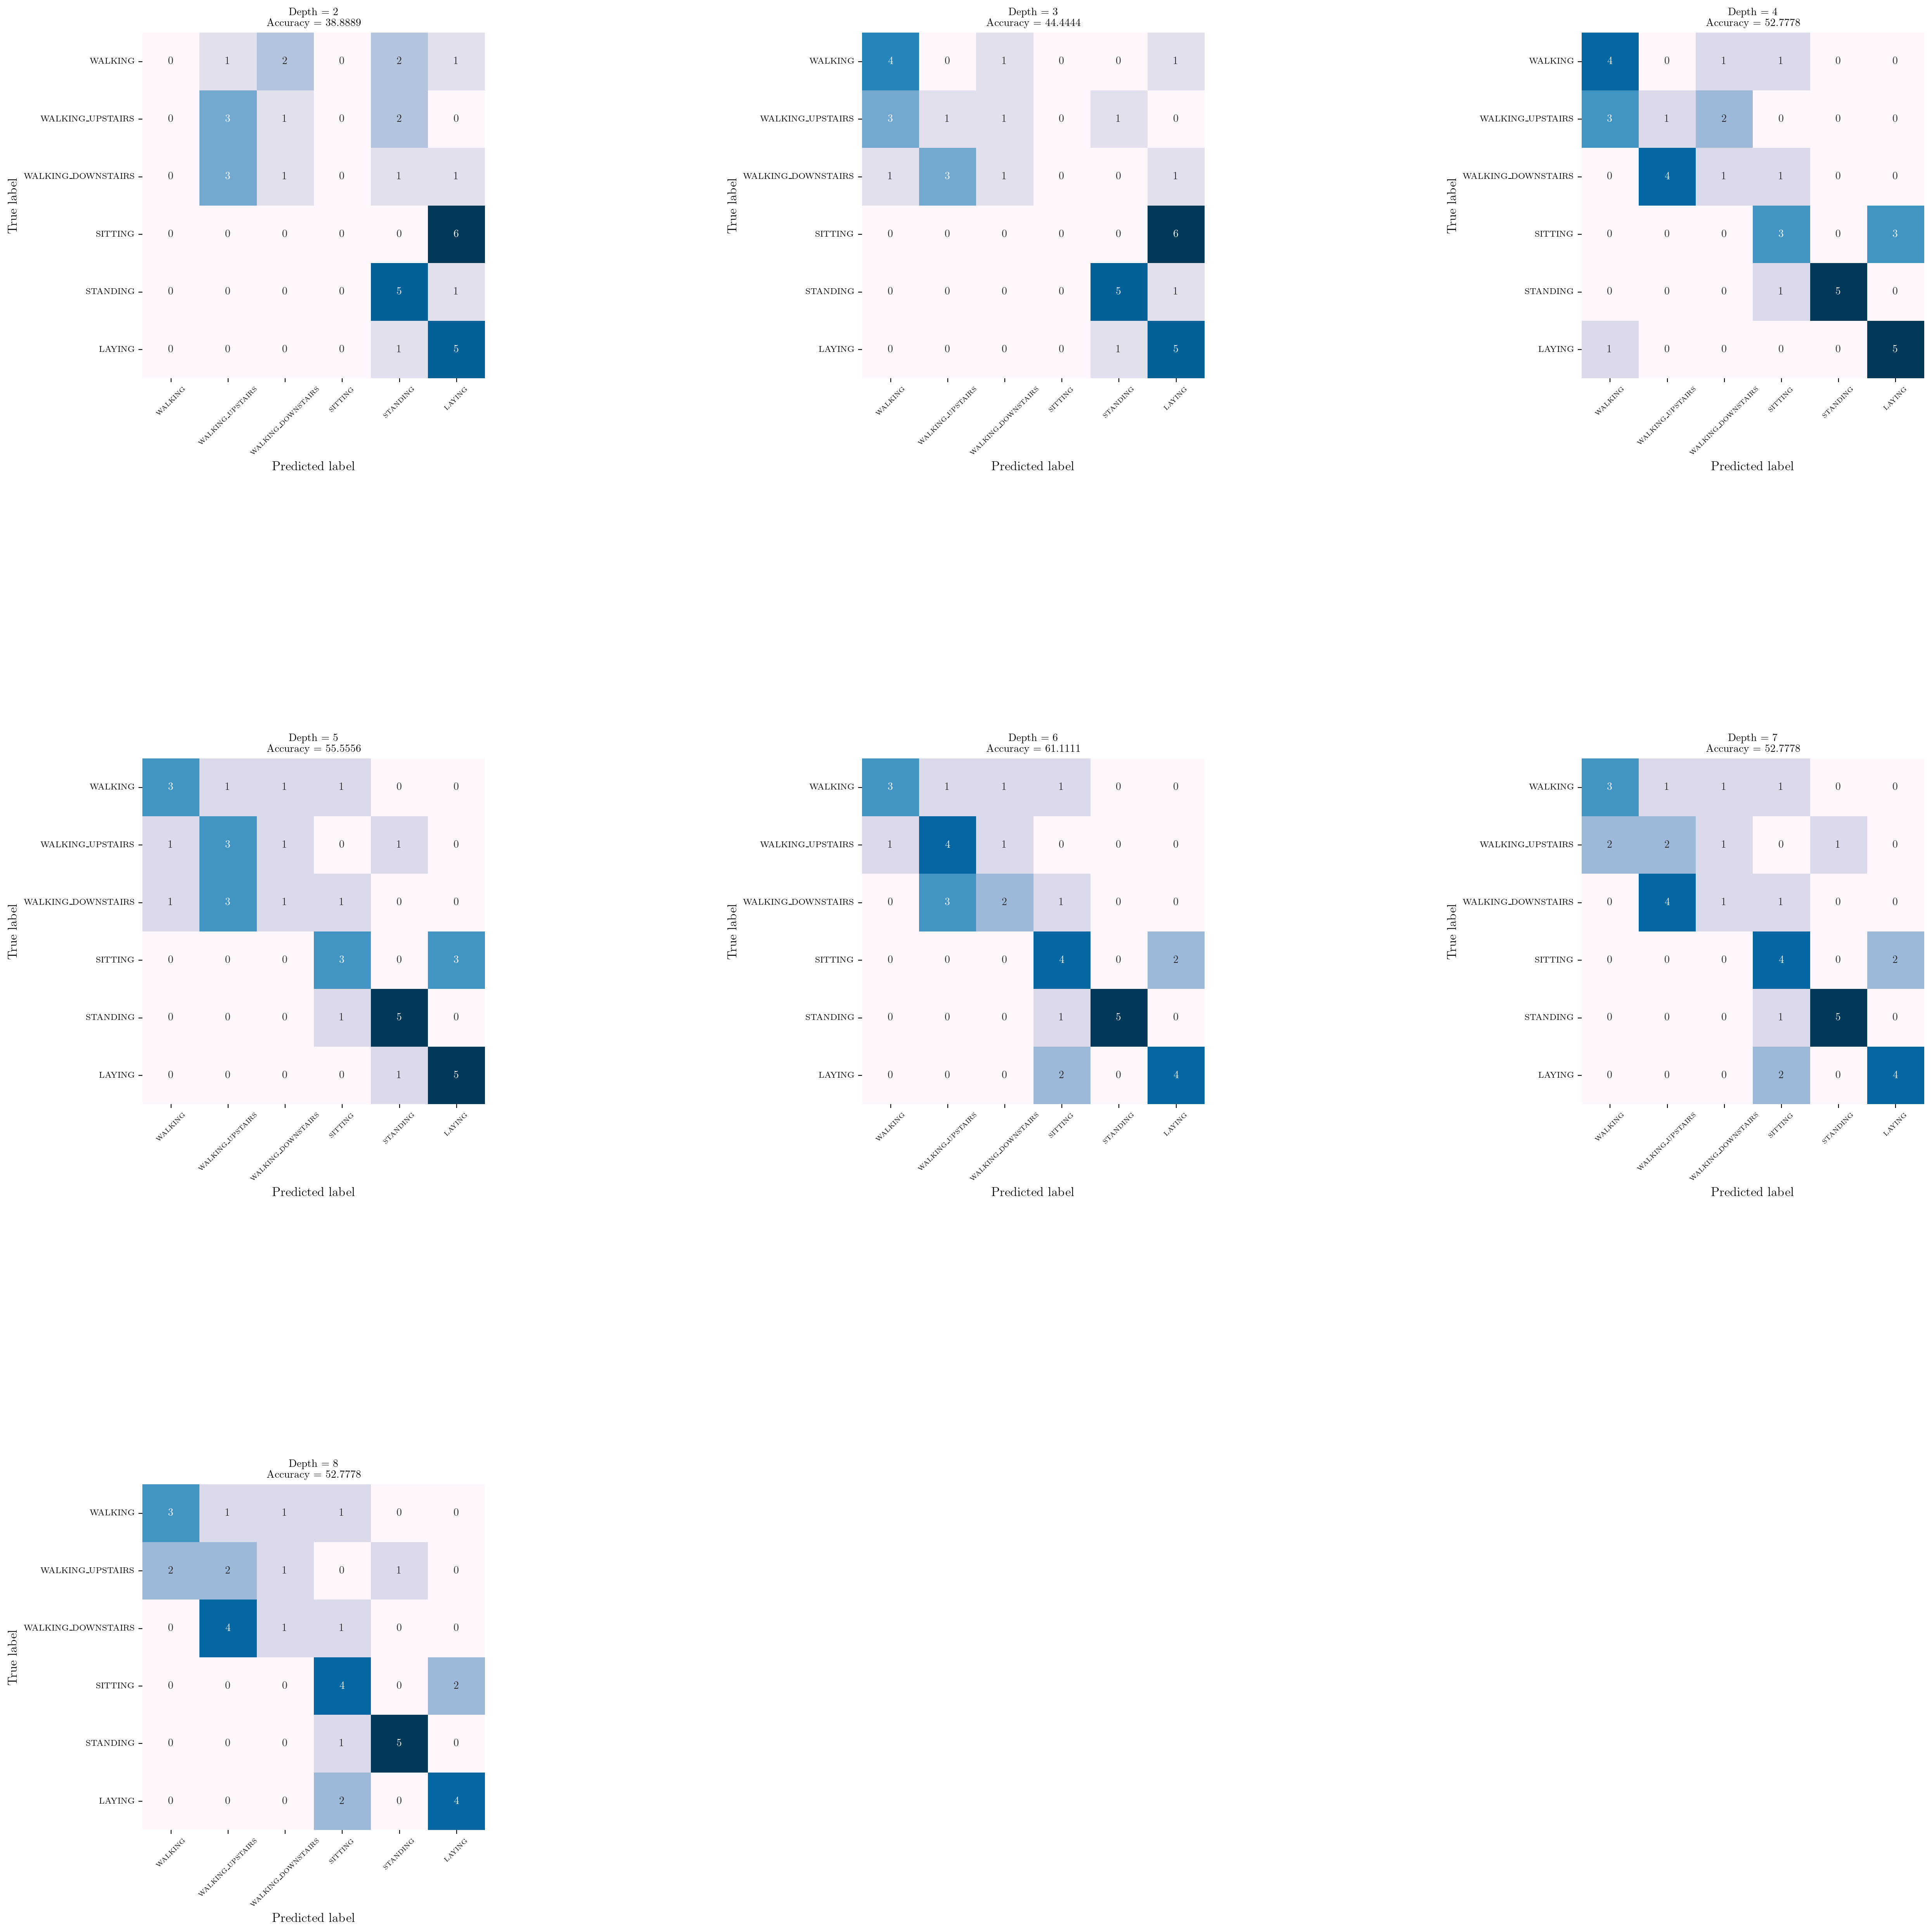

In [281]:
confMatrix(confusion_matrices1, flag = 0, accuracies = accuracies1)

## Accuracy Comparison for both **RAW TimeSeries** and **5-Featurized Data**

In [282]:
print(accuracies)
print(accuracies1)

[0.6111111111111112, 0.6388888888888888, 0.6388888888888888, 0.7222222222222222, 0.6666666666666666, 0.6944444444444444, 0.6388888888888888]
[0.3888888888888889, 0.4444444444444444, 0.5277777777777778, 0.5555555555555556, 0.6111111111111112, 0.5277777777777778, 0.5277777777777778]


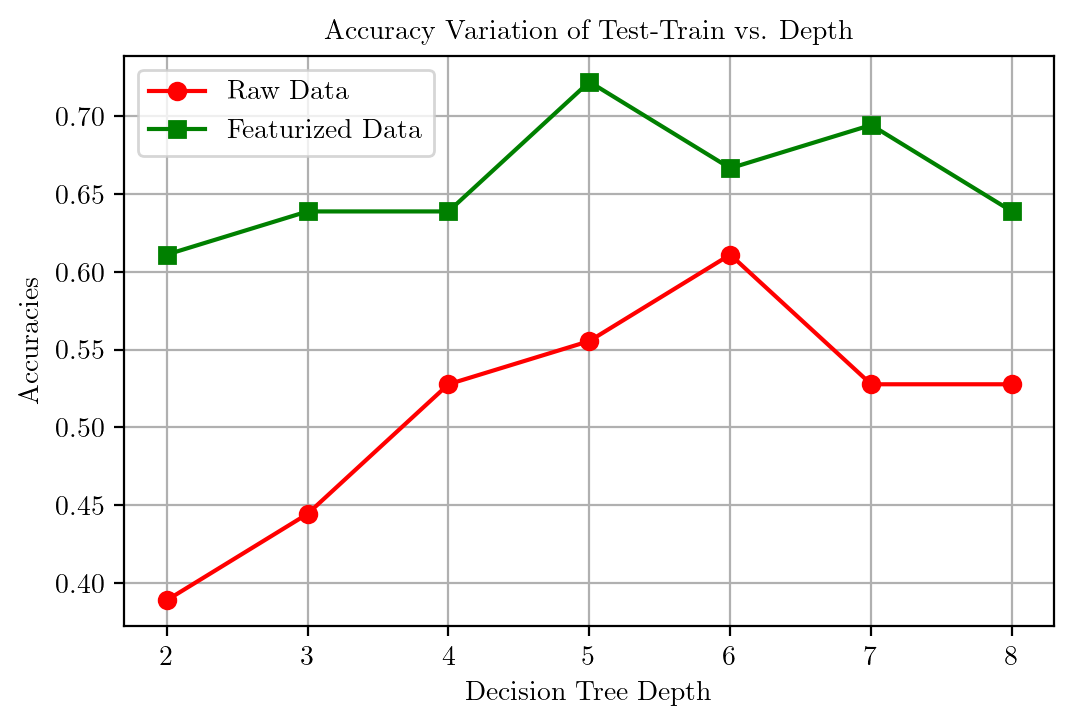

In [294]:
plt.plot(range(2, 9), accuracies1, color = "r", marker = "o")
plt.plot(range(2, 9), accuracies, color = "g", marker = "s")
plt.xlabel("Decision Tree Depth")
plt.ylabel("Accuracies")
plt.title("Accuracy Variation of Test-Train vs. Depth")
plt.legend(["Raw Data", "Featurized Data"])
plt.grid()

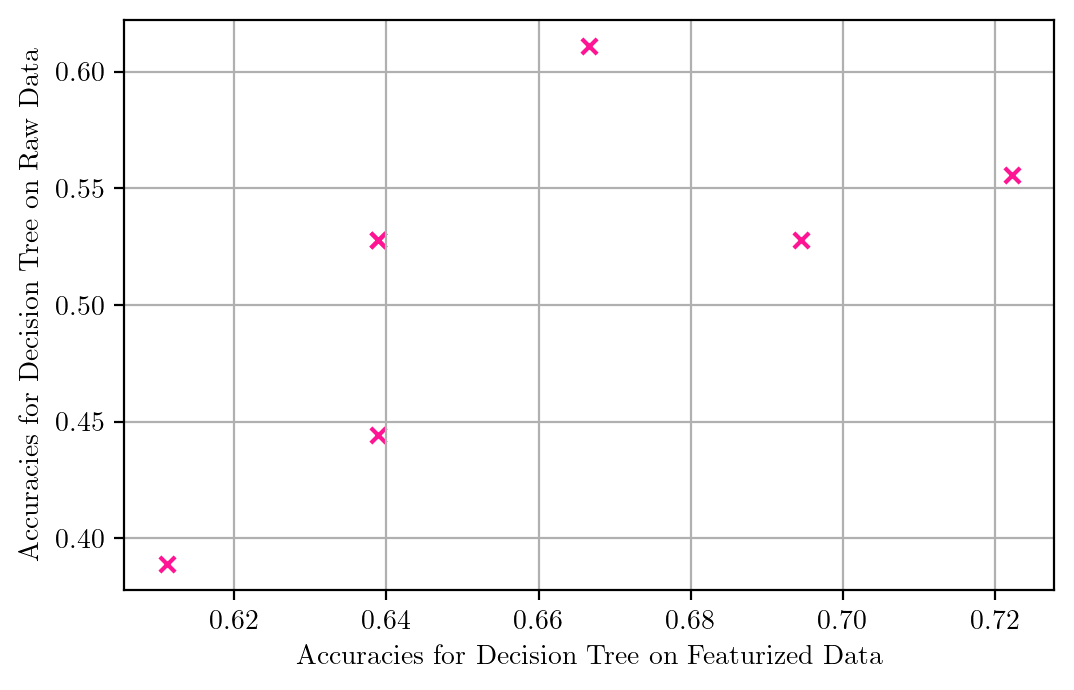

In [291]:
plt.scatter(accuracies, accuracies1, marker = "x", color = "deeppink", s = 30)
plt.xlabel("Accuracies for Decision Tree on Featurized Data")
plt.ylabel("Accuracies for Decision Tree on Raw Data")
plt.grid()

## Now same for $18$ Featured ```dfFeat```

### Firstly Featurize the Test Dataset according to the $18$ features

In [ ]:
dfNF_test = Featuriser(X_test_TS, y_test, f_sel)

In [354]:
model = DecisionTreeClassifier()
clfg = model.fit(dfFeat.iloc[:, :-3], dfFeat.iloc[:, 18])
y_pred = clfg.predict(dfNF_test.iloc[:, :-3])
y_pred

array([3, 3, 6, 2, 6, 4, 6, 1, 1, 2, 4, 6, 2, 5, 2, 4, 5, 5, 2, 6, 4, 1,
       2, 5, 3, 2, 2, 4, 3, 4, 6, 6, 4, 3, 3, 1])

In [355]:
y_test

array([3, 3, 6, 2, 6, 5, 6, 1, 1, 3, 5, 6, 1, 5, 3, 4, 5, 5, 1, 6, 4, 1,
       2, 5, 2, 1, 3, 6, 3, 4, 4, 4, 4, 2, 2, 2])

### Accuracy Score for decision tree classifier on TEST data trained on our 18 featurized dataset

In [356]:
accuracy_score(y_test, y_pred)

0.5833333333333334

### Classification Report for decision tree classifier on TEST data trained on our 18 featurized dataset

In [357]:
print(classification_report(y_test, y_pred, labels = np.unique(y_pred)))

              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           2       0.25      0.33      0.29         6
           3       0.50      0.50      0.50         6
           4       0.57      0.67      0.62         6
           5       1.00      0.67      0.80         6
           6       0.71      0.83      0.77         6

    accuracy                           0.58        36
   macro avg       0.63      0.58      0.60        36
weighted avg       0.63      0.58      0.60        36



In [358]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes])

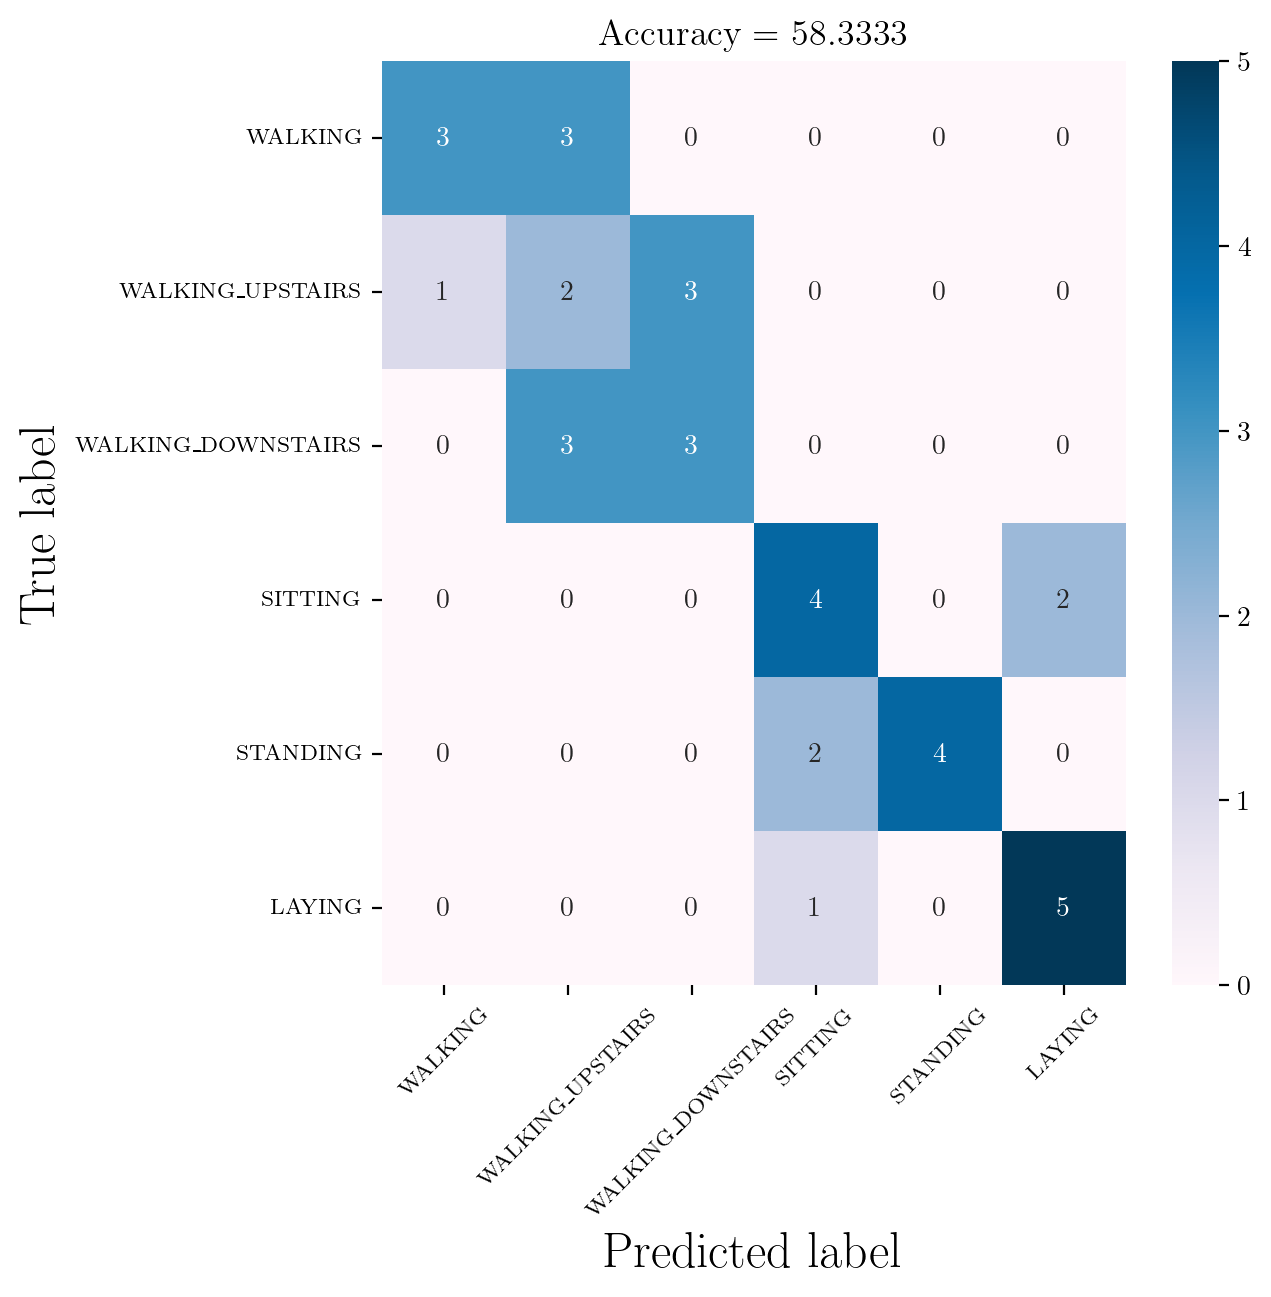

In [359]:
confMatrix(df_cm, flag = 1)

### Fetching the Connfusion Matrices, Class Reports, Accuracies for Depth $(2 - 8)$ Tree on **18-Featurized Data**

In [360]:
confusion_matrices, class_reports, class_reports_dict, accuracies = [], [], [], []
for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i, random_state = 42)
    clfg = model.fit(dfFeat.iloc[:, :-3], dfFeat.iloc[:, 18])
    y_pred = clfg.predict(dfNF_test.iloc[:, :-3])
    
    pred, actual = y_pred, y_test
    
    cm = confusion_matrix(actual, pred)
    
    confusion_matrices.append(pd.DataFrame(cm, index = [classT for classT in classes], columns = [classT for classT in classes]))
    class_reports.append(classification_report(actual, pred, labels = np.unique(pred)))
    class_reports_dict.append(classification_report(actual, pred, labels = np.unique(pred), output_dict = True))
    accuracies.append(accuracy_score(actual, pred))

### $7$ Confusion Matrices for **18-Featurized Data**

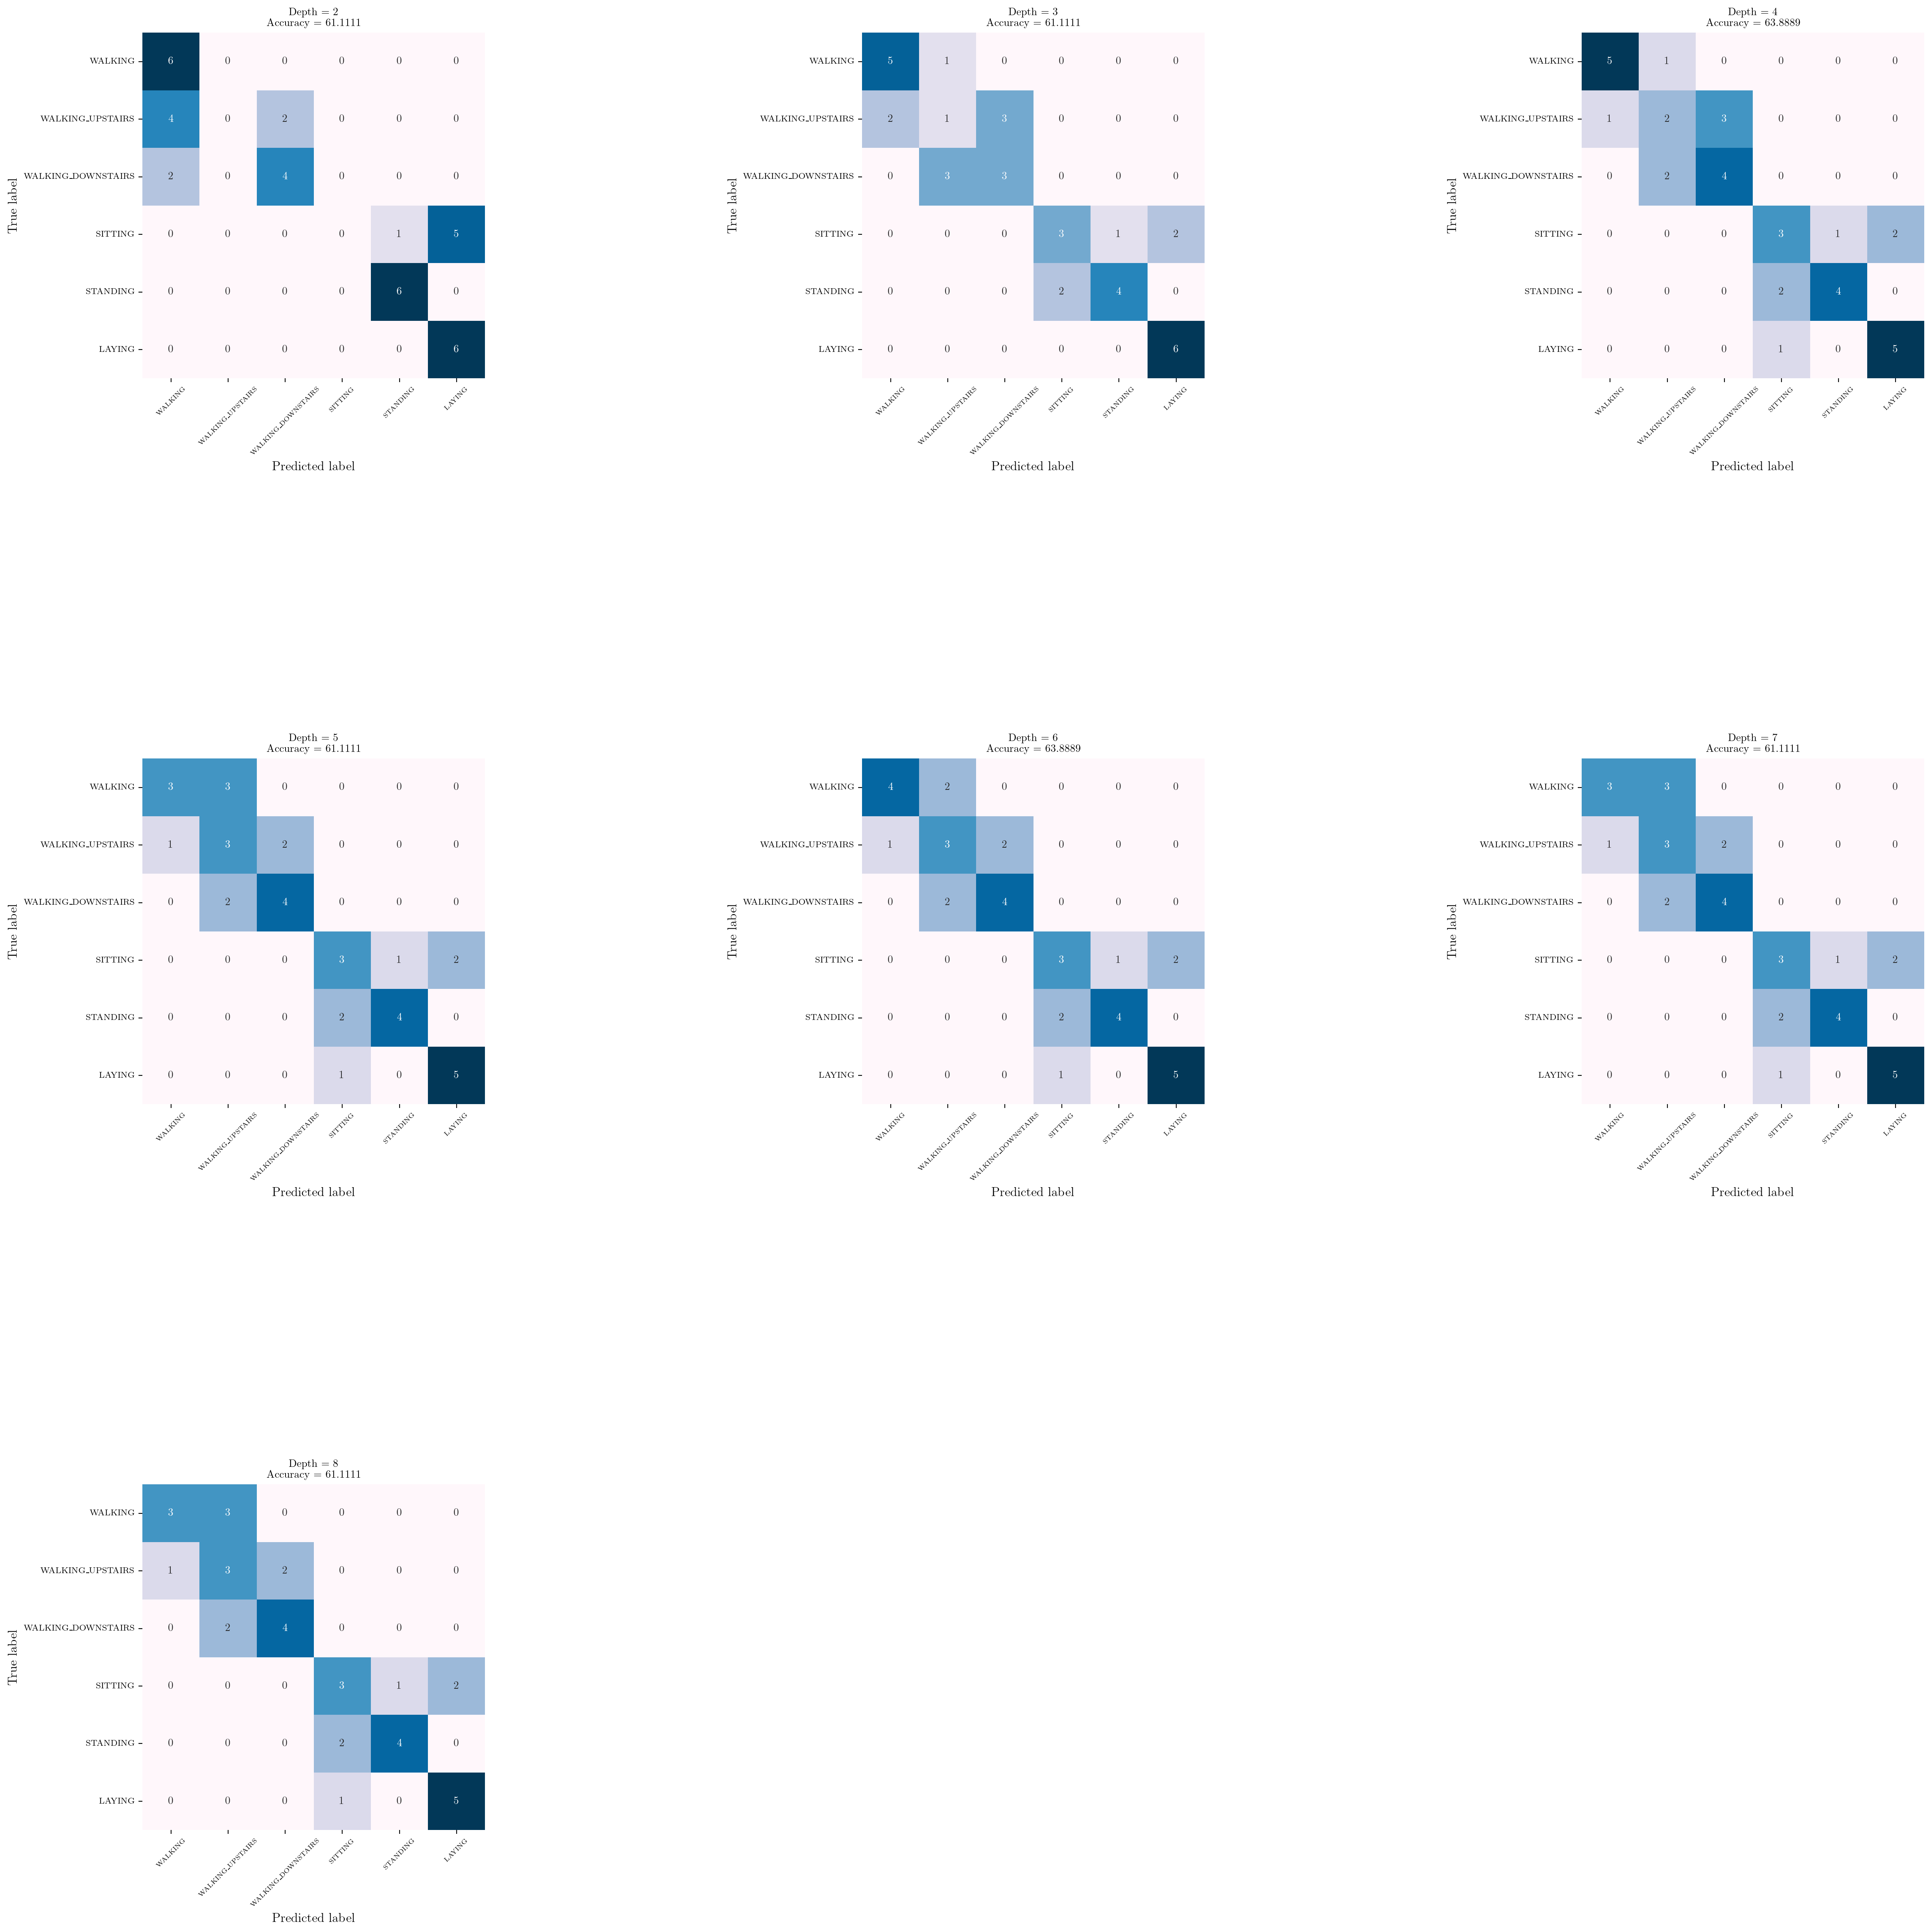

In [361]:
confMatrix(confusion_matrices, flag = 0, accuracies = accuracies)

## Accuracy Comparison for both **RAW TimeSeries** and **18-Featurized Data**

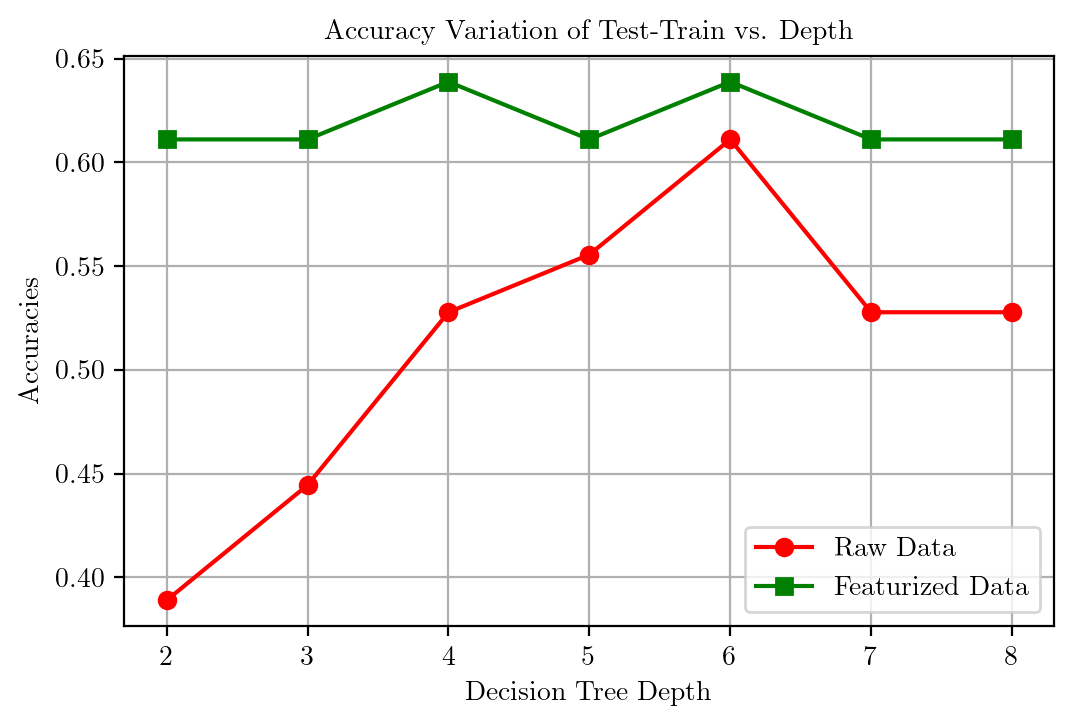

In [362]:
plt.plot(range(2, 9), accuracies1, color = "r", marker = "o")
plt.plot(range(2, 9), accuracies, color = "g", marker = "s")
plt.xlabel("Decision Tree Depth")
plt.ylabel("Accuracies")
plt.title("Accuracy Variation of Test-Train vs. Depth")
plt.legend(["Raw Data", "Featurized Data"])
plt.grid()

## The **5 - Featured** ```dfNewFeaturized``` is better than the **18 - Featured** ```dfFeat``` that had spectral features included too